<a href="https://colab.research.google.com/github/Camila-Aroca/Camila-Aroca/blob/main/Entrega_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA - Análisis Exploratorio de Datos**

# **1. Business Understanding**

El Banco Monopoly es una institución financiera que ofrece diversos productos a sus clientes: tarjetas de crédito y débito, créditos hipotecarios y de consumo, y cuentas corrientes. También dispone de banca web, aunque no todos los clientes la utilizan. En el segmento de tarjetas, los clientes pueden realizar compras y avances tanto nacionales como internacionales, lo que genera flujos de ingresos por comisiones, intereses y uso de cupos.

El dataset disponible se encuentra a nivel de cliente: cada fila representa a una persona e incluye datos de perfil (sexo, edad, renta, antigüedad), tenencia de productos (cuentas corrientes, créditos, uso de banca web), y comportamiento con tarjetas (número de tarjetas, cupo total, transacciones, pagos, avances y compras). Este tipo de información permite comprender el perfil crediticio y los hábitos de consumo de los clientes, lo cual es clave para la gestión del riesgo y la rentabilidad bancaria.

En particular, el cupo asignado a las tarjetas de crédito (específicamente el CUPO_L1, correspondiente al monto máximo disponible para compras nacionales) es un componente central en la política crediticia del banco. Determinar de forma óptima este cupo es crucial: un monto demasiado bajo puede limitar el uso de la tarjeta y reducir las comisiones generadas, mientras que un monto demasiado alto aumenta el riesgo de incumplimiento o sobreendeudamiento.

Por ello, un modelo predictivo que permita estimar el cupo óptimo para cada cliente podría mejorar significativamente el equilibrio entre rentabilidad y riesgo, al apoyar decisiones más informadas en la asignación de líneas de crédito.

## **1.1. Problema de negocio (qué queremos responder)**

El Banco Monopoly busca optimizar la asignación de cupos de crédito en sus tarjetas para equilibrar la rentabilidad con el control del riesgo financiero.
Actualmente, los cupos (CUPO_L1) se asignan mediante políticas generales y criterios discretos (como renta o antigüedad), pero no existe un modelo analítico que prediga el monto más adecuado según el perfil integral del cliente.

La pregunta guía de este estudio es:

¿Qué factores determinan el monto del cupo de crédito (CUPO_L1) que debería asignarse a un cliente?
y más específicamente,
¿podemos predecir el valor del cupo nacional óptimo de una tarjeta de crédito a partir de las características del cliente y su comportamiento financiero?

Responder esta pregunta permitirá al banco:

Asignar cupos de manera más personalizada y justa.

Identificar clientes con alto potencial de crédito subasignados.

Reducir el riesgo crediticio derivado de cupos sobredimensionados.

Aumentar la eficiencia del proceso de aprobación de tarjetas mediante predicciones automatizadas.

## **1.2. Justificación del Target: TC (Número de Tarjetas de Crédito)**

La variable CUPO_L1 representa el cupo de línea de crédito nacional asignado a cada cliente.
Su selección como variable objetivo se justifica tanto desde una perspectiva estratégica de negocio como analítica.

Desde el punto de vista del negocio:

El cupo de crédito es un indicador clave del poder adquisitivo y del nivel de confianza que el banco deposita en el cliente.

Determina el potencial de ingresos por comisiones, intereses y uso del crédito.

Una asignación más precisa de cupos permite maximizar la rentabilidad sin comprometer la estabilidad del portafolio crediticio.

Desde el punto de vista analítico:

CUPO_L1 es una variable continua y numérica positiva, ideal para un enfoque de regresión supervisada.

Su relación con otras variables (como Renta, Antiguedad, Cuentas, Dualidad, CUPO_MX y Adicional) puede capturar patrones financieros relevantes.

El análisis de esta variable permitirá identificar los factores más influyentes en la determinación del cupo, ofreciendo información valiosa para la toma de decisiones estratégicas.

Por lo tanto, CUPO_L1 se selecciona como foco central del análisis, ya que su predicción permite alinear los objetivos analíticos con los objetivos comerciales del banco, fortaleciendo tanto la gestión del riesgo como la rentabilidad.

## Fase 2: Data Understanding

En este primer bloque, importamos librerías necesarias y también creamos un dataframe que nos permita una vista rápida de los nombres de cada columna.

In [35]:
#Permite una vista rápida de nombres de cada columna

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

pd.set_option("display.max_columns", 120)
pd.set_option("display.width", 140)

FILE = "Base_clientes_Monopoly-0.csv"
df = pd.read_csv(FILE, low_memory=False, header=0) # Specify header=0

print("Dimensiones:", df.shape)
df.head(3)

Dimensiones: (51125, 575)


,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,1.10,1.11,1.12,1.13,1.14,1.15,1.16,1.17,1.18,1.19,1.20,1.21,1.22,1.23,1.24,1.25,1.26,1.27,1.28,1.29,1.30,1.31,1.32,1.33,1.34,1.35,1.36,1.37,1.38,1.39,1.40,1.41,1.42,1.43,1.44,1.45,1.46,1.47,1.48,1.49,1.50,1.51,1.52,1.53,1.54,1.55,1.56,1.57,1.58,1.59,...,1.515,1.516,1.517,1.518,1.519,1.520,1.521,1.522,1.523,1.524,1.525,1.526,1.527,1.528,1.529,1.530,1.531,1.532,1.533,1.534,1.535,1.536,1.537,1.538,1.539,1.540,1.541,1.542,1.543,1.544,1.545,1.546,1.547,1.548,1.549,1.550,1.551,1.552,1.553,1.554,1.555,1.556,1.557,1.558,1.559,1.560,1.561,1.562,1.563,1.564,1.565,1.566,1.567,1.568,1.569,1.570,1.571,1.572,1.573,574
0,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,Ctacte,Consumo,Hipotecario,Debito,CambioPin,Cuentas,TC,CUPO_L1,CUPO_L2,CUPO_MX,FlgAct_T12,FlgActCN_T12,FlgActCI_T12,FlgActAN_T12,FlgActAI_T12,FlgActPAT_T12,FlgActCCPC_T12,FlgActCCOT_T12,FlgActCOL_T12,Fac_T12,Txs_T12,FacCN_T12,TxsCN_T12,FacCI_T12,TxsCI_T12,FacAN_T12,TxsAN_T12,FacAI_T12,TxsAI_T12,FacPAT_T12,TxsPAT_T12,FacCCPC_T12,TxsCCPC_T12,FacCCOT_T12,TxsCCOT_T12,FacCOL_T12,TxsCOL_T12,FacDebCom_T12,TxsDebCom_T12,FacDebAtm_T12,TxsDebAtm_T12,Col_T12,ColL1T0_T12,ColL1TE_T12,ColL2T0_T12,ColL2AC_T12,ColL2CC_T12,ColMx_T12,PagoNac_T12,...,ColL2T0_T02,ColL2AC_T02,ColL2CC_T02,ColMx_T02,PagoNac_T02,PagoInt_T02,EeccNac_T02,EeccInt_T02,UsoL1_T02,UsoL2_T02,UsoLI_T02,IndRev_T02,FlgAct_T01,FlgActCN_T01,FlgActCI_T01,FlgActAN_T01,FlgActAI_T01,FlgActPAT_T01,FlgActCCPC_T01,FlgActCCOT_T01,FlgActCOL_T01,Fac_T01,Txs_T01,FacCN_T01,TxsCN_T01,FacCI_T01,TxsCI_T01,FacAN_T01,TxsAN_T01,FacAI_T01,TxsAI_T01,FacPAT_T01,TxsPAT_T01,FacCCPC_T01,TxsCCPC_T01,FacCCOT_T01,TxsCCOT_T01,FacCOL_T01,TxsCOL_T01,FacDebCom_T01,TxsDebCom_T01,FacDebAtm_T01,TxsDebAtm_T01,Col_T01,ColL1T0_T01,ColL1TE_T01,ColL2T0_T01,ColL2AC_T01,ColL2CC_T01,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target,NaN
1,1,160,M,13,43,NaN,130,1,1,0,0,1,0,0,1,NaN,1,3,798000,1012000,1210,1,1,0,0,0,0,1,0,0,55490,3,55490,3,0,0,0,0,0,0,0,0,25890,1,0,0,0,0,247982,30,70000,6,675198,0,675198,0,0,0,0,22000,...,0,0,43696,0,33000,0,1072040,0,1072040,29396,0,R,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,204133,28,24000,2,1069735,0,1040339,0,0,29396,0,33000,0,1099866,0,1099866,15080,0,R,0,NaN
2,2,160,H,13,46,143640,69,1,0,0,0,1,0,1,0,NaN,1,1,750000,150000,1000,1,1,0,0,0,0,1,0,0,19813,1,19813,1,0,0,0,0,0,0,0,0,19813,1,0,0,0,0,0,0,0,0,370529,10000,82504,278025,0,0,0,250000,...,4764,0,0,0,14000,0,462736,0,462736,9529,0,R,1,1,0,0,0,0,1,0,0,118247,1,118247,1,0,0,0,0,0,0,0,0,118247,1,0,0,0,0,0,0,0,0,211884,0,162939,48945,0,0,0,300000,0,214592,0,214592,83596,0,R,0,NaN



## 2.1. Clasificación de variables para Data Understanding (CRISP-DM)

A continuación se separan las variables del dataset **Banco Monopoly** en **categóricas** y **numéricas**, separándolas en subtipos cuando corresponda.
---

## 1) Variables categóricas

Se refiere a aquellas que indican una clasificación o pertenencia a una cierta categoría o grupo en oposición a variables numéricas que indican una magnitud medible.

Dentro de las variables categóricas, identificamos variables nominales, binarias y ordinales.

### 1.1 Nominales
Se refiere a quellas que tienen 2 o más categorías que no son indicativas de alguna jerarquía.

* **Region** (región de residencia)
* **Subsegmento**

### 1.2 Binarias 0/1 (indicadores de tenencia/uso)
Se refiere a variables categóricas que sólo tienen 2 resultados posibles.

* **Sexo**
* **Adicional** (tiene Tarjetas de crédito -TC- adicionales)
* **Consumo** (tiene crédito de consumo)
* **Debito** (tiene tarjeta de débito)
* **Ctacte** (tiene cuenta corriente)
* **Hipotecario** (tiene crédito hipotecario)
* **Internauta** (usa la web del banco)
* **Monoproducto** (solo posee una TC)
* **Dualidad** (tiene ≥2 TC)
* **CambioPin** (realizó cambio de clave) — *En este caso, las opciones posibles en esta variable son NULL si no ha cambiado la clave, y 1 si la ha cambiado-*


### 1.3 Variable correlativo

* **CORRELATIVO** (ID de cliente) En este caso, la identificamos como una variable nominal, pero consideramos que cabe mencionarla por separado dado que tiene valores únicos, ya que cumple el rol de identificador.

---

## 2) Variables numéricas

Se refiere a las que expresan una cantidad o medida cuantificable. Se subdividen entre continuas (pueden tomar cualquier valor dentro de un rango) y discretas, que sólo pueden tomar valores enteros específicos.


### 2.1 Conteos/enteras (discretas)

* **TC** (número de tarjetas de crédito)
* **Cuentas** (número de cuentas)
* **Txs\_T12**, **TxsAI\_T12**, **TxsAN\_T12**, **TxsCCOT\_T12**, **TxsCCPC\_T12**, **TxsCI\_T12**, **TxsCN\_T12**, **TxsCOL\_T12**, **TxsDebAtm\_T12**, **TxsDebCom\_T12**, **TxsPAT\_T12** (número de transacciones por tipo en el mes X)
* **FlgAct\_T12**, **FlgActAI\_T12**, **FlgActAN\_T12**, **FlgActCCOT\_T12**, **FlgActCCPC\_T12**, **FlgActCI\_T12**, **FlgActCN\_T12**, **FlgActCOL\_T12**, **FlgActPAT\_T12** (suma de meses activos por tipo)

Si bien las 2 variables siguientes (Edad y antiguedad) en otros contextos pueden tratarse como continuas, en el caso en estudio, las mismas se representan como variables que sólo pueden números enteros específicos, por lo que para el contexto de Monopoly las consideramos enteras.

* **Edad** (años)
* **Antiguedad** (meses de relación)


### 2.2 Continuas
* **Renta** (ingreso del cliente)
* **CUPO\_L1** (límite de compras nacionales)
* **CUPO\_MX** (límite compras internacionales)
* **CUPO\_L2** (límite para avances en cuotas)
* **Col\_T12**, **ColL1TE\_T12** (colocación/revolving)
* **EeccInt\_T12**, **EeccNac\_T12** (monto exigido en estado de cuenta; *puede ser negativo por ajustes/saldos a favor*).
* **Fac\_T12** (total facturado TC, si aplica) y desgloses:
  **FacAI\_T12**, **FacAN\_T12**, **FacCCOT\_T12**, **FacCCPC\_T12**, **FacCI\_T12**, **FacCN\_T12**, **FacCOL\_T12** (montos por tipo de transacción en TC).
* **FacDebAtm\_T12**, **FacDebCom\_T12** (montos en TD).
* **FacPAT\_T12** (monto en PAT).
* **PagoInt\_T12**, **PagoNac\_T12** (pagos realizados).
* **UsoL1\_T12**, **UsoL2\_T12**, **UsoLI\_T12** (deuda/utilización por línea; *pueden aparecer negativos*).

### Resumen

* **Categóricas**: `Region`, `Sexo`, `Subsegmento`, y todos los **indicadores 0/1** (Internauta, Ctacte, Debito, Consumo, Hipotecario, Monoproducto, Adicional, Dualidad, CambioPin).
* **Numéricas (demográficas/capacidad/uso)**: `Edad`, `Antiguedad`, `Renta`, `CUPO_*`, `TC`, `Cuentas`, `Txs_*`, `FlgAct_*`, `Eecc_*`, `Fac*`, `Pago*`, `Uso*`.
* **ID**: `CORRELATIVO`

Esta clasificación guía el **EDA** (qué gráficos/estadísticos usar) y el **preprocesamiento** (imputación, codificación, transformaciones, escalado) previo a la siguiente fase de CRISP-DM.


## 2.2. Análisis de Distribución de Variables:

En esta etapa se realizó un análisis exploratorio con el fin de comprender la estructura y comportamiento general del dataset, así como la distribución de los clientes según diferentes variables demográficas y financieras. Se exploraron características como el sexo, los rangos etarios y el nivel de renta, buscando identificar posibles patrones o concentraciones dentro de la base de clientes.

### 2.2.1. Conclusión:

El análisis exploratorio inicial muestra que la base de clientes del Banco Monopoly está compuesta de forma equilibrada en términos de género, con una ligera mayoría de mujeres (≈54%) respecto a hombres (≈46%).

En cuanto a la edad, se observa una fuerte concentración en los segmentos jóvenes y adultos jóvenes, particularmente entre los 20 y 39 años, que en conjunto representan la mayor parte de la cartera. A medida que aumenta la edad, la cantidad de clientes disminuye de forma progresiva, lo que sugiere una base predominantemente activa en etapas de consolidación laboral y financiera.

Respecto al nivel de renta, la mayoría de los clientes se ubica en los tramos inferiores a 1 millón de CLP mensuales, con una caída pronunciada en los segmentos de mayores ingresos. Esto indica que el banco posee una cartera con predominancia de clientes de ingresos medios y medios-bajos, alineada con el perfil de la banca masiva.

En conjunto, estos resultados permiten comprender el perfil general del cliente típico, sin entrar aún en distinciones más específicas como productos financieros o comportamiento de pago.

/tmp/ipython-input-1707152415.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='1.2', data=df_sexo, palette='pastel')


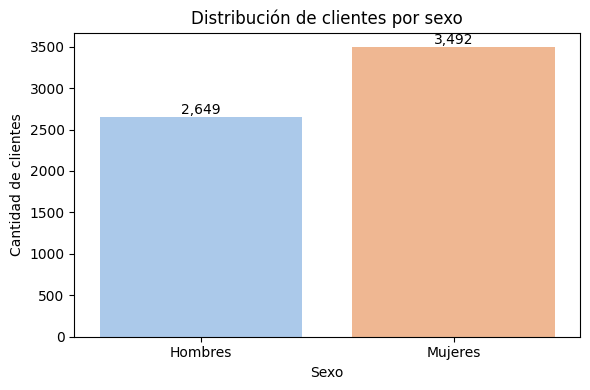

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar solo H y M válidos en la columna de sexo
df_sexo = df[df['1.2'].isin(['H', 'M'])]

# Gráfico de barras
plt.figure(figsize=(6,4))
sns.countplot(x='1.2', data=df_sexo, palette='pastel')

# Etiquetas
plt.title('Distribución de clientes por sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad de clientes')
plt.xticks(ticks=[0,1], labels=['Hombres', 'Mujeres'])

# Mostrar cantidades sobre las barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height()):,}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


/tmp/ipython-input-358860958.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_edad['rango_edad'] = pd.cut(df_edad['1.4'], bins=bins, labels=labels, right=False, include_lowest=True)
/tmp/ipython-input-358860958.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_edades.index, y=conteo_edades.values, palette='viridis')


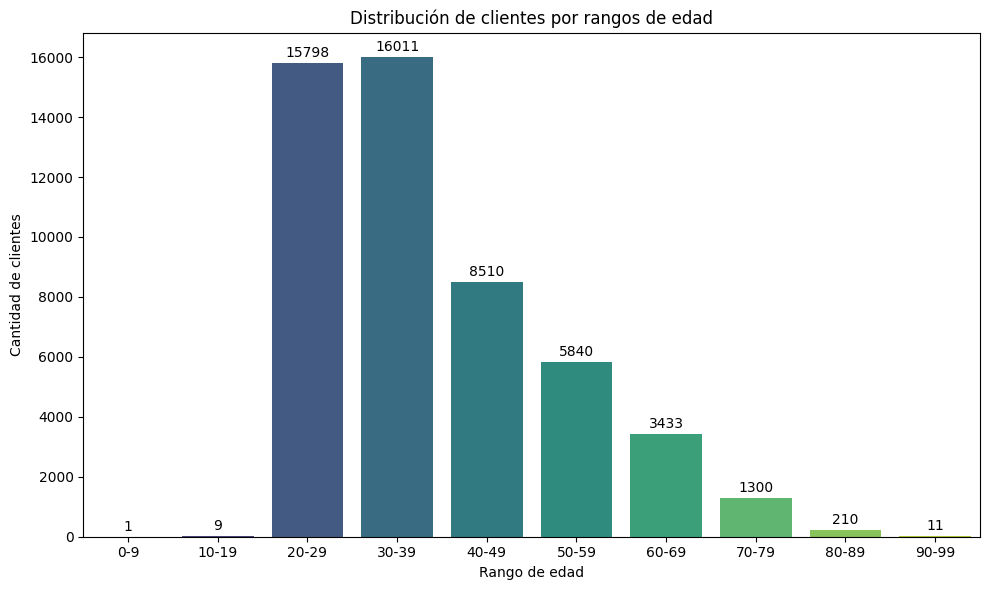

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarse de que la columna de edad esté en formato numérico
df['1.4'] = pd.to_numeric(df['1.4'], errors='coerce')

# Eliminar filas con edad nula
df_edad = df[df['1.4'].notna()]

# Crear rangos de edad desde 0 hasta 105 (incluye 104)
bins = list(range(0, 106, 10))  # Rangos de 10 en 10: [0,10), [10,20), ..., [100,110)
labels = [f'{i}-{i+9}' for i in bins[:-1]]
df_edad['rango_edad'] = pd.cut(df_edad['1.4'], bins=bins, labels=labels, right=False, include_lowest=True)

# Contar clientes por rango
conteo_edades = df_edad['rango_edad'].value_counts().sort_index()

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=conteo_edades.index, y=conteo_edades.values, palette='viridis')

# Etiquetas
plt.title('Distribución de clientes por rangos de edad')
plt.xlabel('Rango de edad')
plt.ylabel('Cantidad de clientes')

# Mostrar números sobre las barras
for i, value in enumerate(conteo_edades.values):
    plt.text(i, value + 100, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()


Dimensiones: (51125, 575)
Primeras columnas: ['1', '1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9']


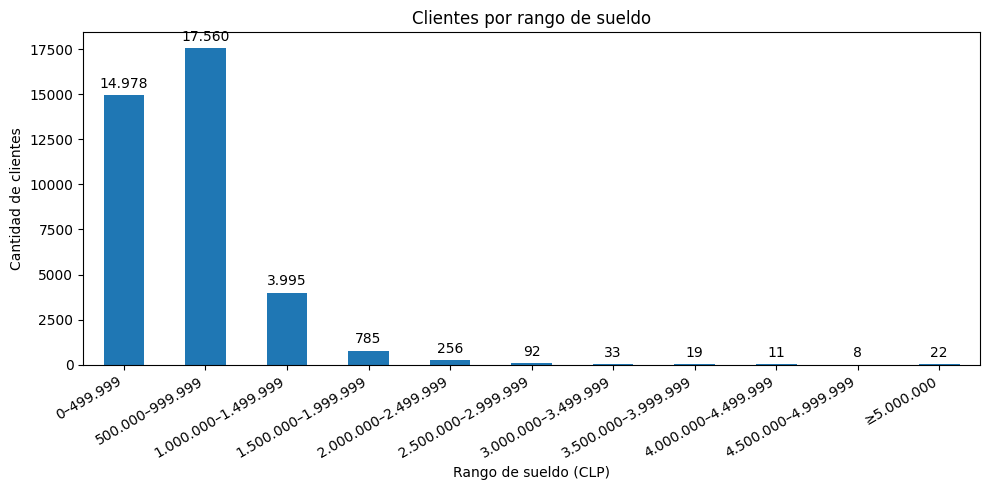

Gráfico guardado en: clientes_por_rango_sueldo.png
Conteo por rango guardado en: conteo_por_rango.csv
1.5
0–499.999              14978
500.000–999.999        17560
1.000.000–1.499.999     3995
1.500.000–1.999.999      785
2.000.000–2.499.999      256
2.500.000–2.999.999       92
3.000.000–3.499.999       33
3.500.000–3.999.999       19
4.000.000–4.499.999       11
4.500.000–4.999.999        8
≥5.000.000                22
Name: count, dtype: int64


In [37]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Tu carga original ---
pd.set_option("display.max_columns", 120)
pd.set_option("display.width", 140)

FILE = "Base_clientes_Monopoly-0.csv"
df = pd.read_csv(FILE, low_memory=False, header=0)

print("Dimensiones:", df.shape)
print("Primeras columnas:", list(df.columns)[:10])  # ayuda rápida

# === Parámetros ===
COL_NAME = "1.5"            # <- columna de sueldo
STEP = 500_000              # tamaño de cada rango
MAX_SALARY = 5_000_000      # tope explícito (habrá un bin ≥ MAX_SALARY)
TITLE = "Clientes por rango de sueldo"

# === Funciones auxiliares ===
def build_salary_bins(step=STEP, max_salary=MAX_SALARY):
    # bins: [0, 500k], [500k, 1M], ..., [4.5M, 5M], [≥5M]
    edges = list(range(0, max_salary + step, step)) + [math.inf]
    labels = []
    for i in range(len(edges) - 2):
        lo = edges[i]
        hi = edges[i+1] - 1  # solo para mostrar legible
        labels.append(f"{lo:,}–{hi:,}".replace(",", "."))
    labels.append(f"≥{max_salary:,}".replace(",", "."))
    return edges, labels

def parse_chilean_number_series(series):
    """
    Convierte strings con formato chileno (puntos de miles, coma decimal) a float.
    También maneja enteros/float ya numéricos. Devuelve serie float con NaN donde no se pudo convertir.
    """
    s = series.astype(str).str.strip()
    # Quitar separador de miles "." y cambiar coma decimal a punto
    s = s.str.replace(".", "", regex=False).str.replace(",", ".", regex=False)
    return pd.to_numeric(s, errors="coerce")

# === Validaciones básicas ===
if COL_NAME not in df.columns:
    raise ValueError(
        f"La columna '{COL_NAME}' no existe. Cols disponibles (primeras 20): {list(df.columns)[:20]}"
    )

# === Limpieza y preparación ===
# 1) Convertir a numérico (soporta formatos con . y ,), 2) excluir nulos, 3) forzar no negativos
s = parse_chilean_number_series(df[COL_NAME]).dropna()
s = s.clip(lower=0)

# === Construir bins y discretizar ===
bins, labels = build_salary_bins()
cats = pd.cut(s, bins=bins, labels=labels, include_lowest=True, right=True)

# === Conteos por rango (incluye bins sin datos con 0) ===
counts = cats.value_counts().reindex(labels, fill_value=0)

# === Gráfico ===
plt.figure(figsize=(10, 5))
ax = counts.plot(kind="bar")
ax.set_title(TITLE)
ax.set_xlabel("Rango de sueldo (CLP)")
ax.set_ylabel("Cantidad de clientes")
plt.xticks(rotation=30, ha="right")

# Etiquetas encima de cada barra
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{int(height):,}".replace(",", "."),
                (p.get_x() + p.get_width() / 2, height),
                ha="center", va="bottom", xytext=(0, 3),
                textcoords="offset points")

plt.tight_layout()
plt.savefig("clientes_por_rango_sueldo.png", dpi=150, bbox_inches="tight")
plt.show()

# === Exportar tabla de conteo (opcional) ===
counts.rename_axis("rango_sueldo").reset_index(name="clientes").to_csv("conteo_por_rango.csv", index=False)

print("Gráfico guardado en: clientes_por_rango_sueldo.png")
print("Conteo por rango guardado en: conteo_por_rango.csv")
print(counts)


## 2.3. Análisis exploratorio centrado en CUPO_L1

### Definición de variables

Luego de una vista general de algunas de las variables más relevantes para identificar si hay diferencias notorias entre grupos demográficos dentro del banco, nos enfocaremos en nuestro target, CUPO_L1, partiendo por determinar con cuáles variables tiene más correlación

📈 Top 10 variables más correlacionadas con CUPO_L1:


,CUPO_L1
0,
CUPO_L1,1.000000
CUPO_MX,0.768104
Antiguedad,0.477625
TC,0.402561
Cuentas,0.399050
Dualidad,0.382276
Adicional,0.133344


/tmp/ipython-input-928123277.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette="crest")


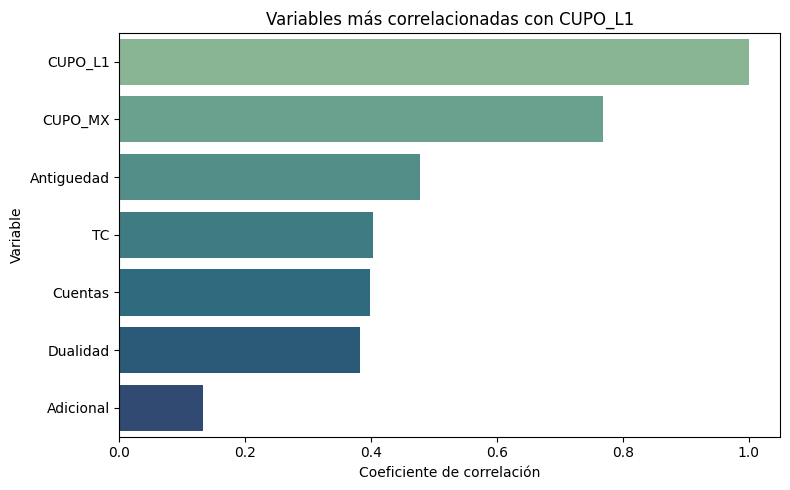

In [38]:
# ======================================
# 🔍 Análisis de correlación con CUPO_L1
# ======================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurar que las columnas sean numéricas
df_numeric = df_clean.select_dtypes(include=['int64', 'float64']).copy()

# Calcular la matriz de correlación
corr_matrix = df_numeric.corr(numeric_only=True)

# Correlación de todas las variables con CUPO_L1
corr_with_cupo = corr_matrix['CUPO_L1'].sort_values(ascending=False)

# Mostrar top 10
top_corr = corr_with_cupo.head(10)
print("📈 Top 10 variables más correlacionadas con CUPO_L1:")
display(top_corr)

# --- Visualización ---
plt.figure(figsize=(8, 5))
sns.barplot(x=top_corr.values, y=top_corr.index, palette="crest")
plt.title("Variables más correlacionadas con CUPO_L1")
plt.xlabel("Coeficiente de correlación")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()


- CUPO_MX (0.768) presenta la correlación más alta con CUPO_L1. Esto resulta lógico, ya que ambos indicadores miden diferentes dimensiones del mismo concepto — el nivel de crédito autorizado al cliente. Mientras que CUPO_L1 se refiere al cupo disponible para compras nacionales, CUPO_MX representa el límite total de crédito o el máximo cupo autorizado.
Esta alta correlación confirma que ambos están estrechamente vinculados y que CUPO_MX puede actuar como un predictor relevante en el modelo.

- Antiguedad (0.478) muestra una correlación positiva moderada: los clientes con más años de relación con el banco tienden a recibir cupos mayores, lo que refleja la confianza acumulada y la estabilidad crediticia que el banco otorga a clientes de larga data.

- TC (0.403), Cuentas (0.399) y Dualidad (0.382) también presentan correlaciones positivas, aunque más moderadas. Esto sugiere que los clientes con más productos bancarios o más de una tarjeta tienden a obtener cupos más altos, probablemente debido a su mayor nivel de vinculación y experiencia financiera con la institución.

- Finalmente, Adicional (0.133) tiene una correlación débil, lo que indica que la existencia de tarjetas adicionales no parece tener una influencia significativa en la asignación del cupo principal.

En conjunto, estos resultados muestran que las variables con mayor poder explicativo sobre el cupo de crédito están asociadas principalmente con el historial y nivel de vinculación del cliente (Antiguedad, Cuentas, Dualidad) y con otros límites de crédito previamente otorgados (CUPO_MX).

### Heatmap: correlaciones de CUPO_L1 con otras variables


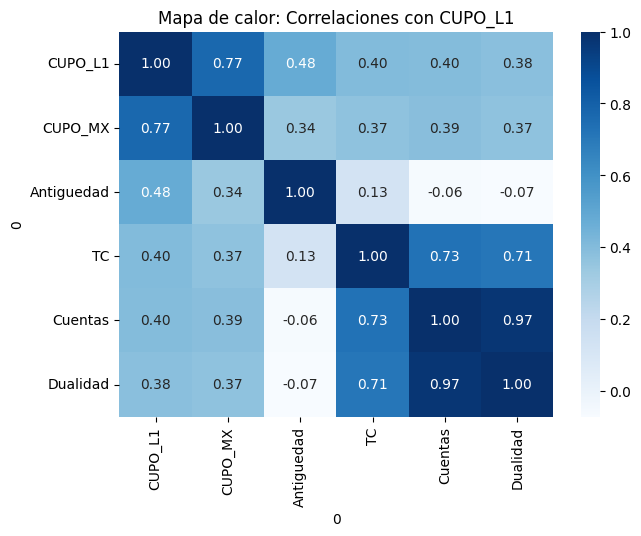

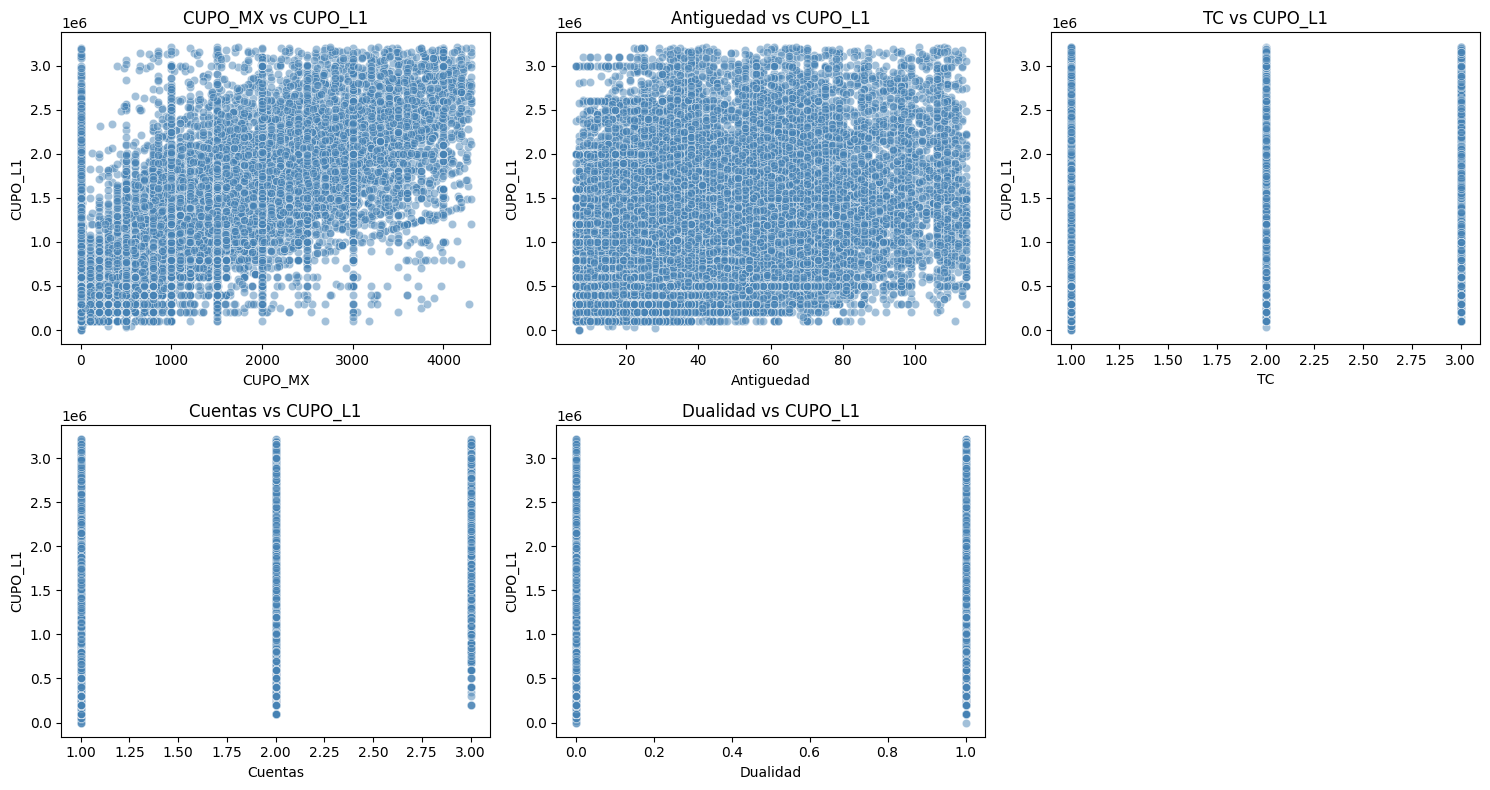

In [39]:
# ======================================
# 🎨 Visualización de correlaciones con CUPO_L1
# ======================================

import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionamos las variables más correlacionadas
top_corr_vars = ['CUPO_MX', 'Antiguedad', 'TC', 'Cuentas', 'Dualidad']

# --- 1️⃣ Heatmap de correlaciones ---
plt.figure(figsize=(7, 5))
sns.heatmap(df_clean[['CUPO_L1'] + top_corr_vars].corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title("Mapa de calor: Correlaciones con CUPO_L1")
plt.show()

# --- 2️⃣ Gráficos de dispersión ---
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, var in enumerate(top_corr_vars):
    sns.scatterplot(data=df_clean, x=var, y='CUPO_L1', alpha=0.5, ax=axes[i], color='steelblue')
    axes[i].set_title(f'{var} vs CUPO_L1')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('CUPO_L1')

# Eliminar eje vacío si sobran subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# 🧰 3. Data Preparation

En esta fase del proceso **CRISP-DM**, el objetivo es preparar los datos para el modelado, garantizando que se encuentren **limpios, consistentes y representativos**.  
Un modelo predictivo es tan robusto como la calidad de los datos que lo alimentan; por ello, esta etapa se centra en **detectar y corregir posibles problemas** como valores faltantes, errores de registro y valores atípicos (*outliers*), así como en escalar o transformar las variables según sea necesario.

En este caso, el conjunto de variables seleccionadas para modelar el **cupo de crédito nacional (`CUPO_L1`)** son aquellas que previamente mostraron mayor correlación con el target:  
`['CUPO_MX', 'Antiguedad', 'TC', 'Cuentas', 'Dualidad', 'Adicional']`.

---

## **3.1. Análisis de valores faltantes y outliers**

Antes de construir los modelos, es necesario evaluar la **completitud y consistencia de las variables predictoras**.  
Por ello, en esta etapa realizaremos dos análisis clave:

1️⃣ **Detección de valores nulos (NaN):**  
   - Determinar qué proporción de los datos presenta información faltante.  
   - Identificar si la ausencia de datos sigue un patrón o es aleatoria.  
   - Definir el método de imputación más adecuado (por ejemplo, KNN Imputer).

2️⃣ **Detección de outliers mediante IQR (Rango Intercuartil):**  
   - Identificar observaciones extremas que podrían distorsionar los resultados del modelo.  
   - Evaluar si deben eliminarse o conservarse según su relevancia.  
   - Aplicar técnicas robustas para reducir su influencia sin eliminar información valiosa.

Estos pasos permitirán avanzar hacia un dataset más confiable y estable, optimizando la capacidad del modelo de regresión para generalizar correctamente.

---


## 3.1.1. Deteccion de nulos

In [44]:
# ======================================
# 🔍 3.1.1 Detección de valores nulos
# ======================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1️⃣ Cargar correctamente los nombres de columnas ---
# La primera fila (fila 0) tiene los nombres numéricos
# La segunda fila (fila 1) tiene los nombres reales
df = pd.read_csv("Base_clientes_Monopoly-0.csv", low_memory=False, header=[0,1])

# Tomamos los nombres reales (segunda fila del encabezado)
df.columns = df.columns.get_level_values(1)

# Eliminamos la primera fila (que contenía los nombres numéricos)
df = df.iloc[1:].reset_index(drop=True)

print("✅ Columnas correctamente cargadas:")
print(df.columns.tolist()[:20])  # muestra las primeras 20 columnas

# --- 2️⃣ Seleccionar variables relevantes ---
features = ['CUPO_L1', 'CUPO_MX', 'Antiguedad', 'TC', 'Cuentas', 'Dualidad', 'Adicional']
df_nulls = df[features].copy()

# --- 3️⃣ Cálculo de valores nulos ---
null_counts = df_nulls.isnull().sum()
null_percent = (null_counts / len(df_nulls)) * 100

null_summary = pd.DataFrame({
    'Valores nulos': null_counts,
    'Porcentaje (%)': null_percent.round(2)
}).sort_values(by='Porcentaje (%)', ascending=False)

print("\n📋 Resumen de valores nulos en variables seleccionadas:")
display(null_summary)



✅ Columnas correctamente cargadas:
['Id', 'Subsegmento', 'Sexo', 'Region', 'Edad', 'Renta', 'Antiguedad', 'Internauta', 'Adicional', 'Dualidad', 'Monoproducto', 'Ctacte', 'Consumo', 'Hipotecario', 'Debito', 'CambioPin', 'Cuentas', 'TC', 'CUPO_L1', 'CUPO_L2']

📋 Resumen de valores nulos en variables seleccionadas:


,Valores nulos,Porcentaje (%)
CUPO_L1,0,0.0
CUPO_MX,0,0.0
Antiguedad,0,0.0
TC,0,0.0
Cuentas,0,0.0
Dualidad,0,0.0
Adicional,0,0.0


### 3.1.2. Tratamiento de nulos con KNNImputer
Si bien no hay nulos en ninguna de nuestras variables predictoras seleccionadas, aplicamos KNN a Renta por ser una de las variables con más nulos.

In [45]:
# 🔧 KNNImputer para imputar SOLO la columna 'Renta' (la única que consideramos utilizar que tiene nulos
# y por tanto la única que se puede imputar)
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer

# 1) Columnas numéricas de contexto para calcular distancias
context_cols = ['Edad', 'Antiguedad', 'CUPO_L1', 'CUPO_MX', 'TC', 'Cuentas', 'Dualidad']
cols_needed = ['Renta'] + [c for c in context_cols if c in df.columns]

# Forzar a numéricas (sin romper el resto del df)
X_knn = df[cols_needed].apply(pd.to_numeric, errors='coerce')

# Indicador de nulos en Renta
renta_na = X_knn['Renta'].isna()

# 2) Configurar el imputador KNN
imputer = KNNImputer(
    n_neighbors=5,
    weights='distance',
    metric='nan_euclidean'
)

# 3) Ajustar y transformar SOLO la matriz de trabajo (Renta + contexto)
X_imputed = pd.DataFrame(
    imputer.fit_transform(X_knn),
    columns=X_knn.columns,
    index=X_knn.index
)

# 4) Reemplazar únicamente los nulos de 'Renta' en el df original
df['Renta_was_na'] = renta_na.astype(int)  # opcional: indicador de “faltó Renta”
df.loc[renta_na, 'Renta'] = X_imputed.loc[renta_na, 'Renta']

# 5) Reporte rápido
n_imputed = renta_na.sum()
pct_imputed = 100 * n_imputed / len(df)
print(f"✅ KNNImputer aplicado a 'Renta' con {imputer.n_neighbors} vecinos (weights='{imputer.weights}').")
print(f"🧩 Valores imputados en Renta: {n_imputed} filas ({pct_imputed:.2f}%).")
print("🔎 Chequeo nulos post-imputación en Renta:", df['Renta'].isna().sum())


✅ KNNImputer aplicado a 'Renta' con 5 vecinos (weights='distance').
🧩 Valores imputados en Renta: 13364 filas (26.14%).
🔎 Chequeo nulos post-imputación en Renta: 0


## 3.1.2 Detección de outliers

In [47]:
# ======================================
# 🔎 Detección de outliers con IQR (solo conteos/%)
# ======================================
import pandas as pd

# Variables a evaluar (ajusta si corresponde)
vars_iqr = ['CUPO_L1', 'CUPO_MX', 'Antiguedad', 'TC', 'Cuentas', 'Dualidad', 'Adicional']

# Subconjunto numérico
df_num = df[vars_iqr].apply(pd.to_numeric, errors='coerce')

# Cálculo IQR por columna
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Máscara de outlier por variable
outlier_mask_per_var = (df_num.lt(lower)) | (df_num.gt(upper))

# Conteo por variable
outliers_count = outlier_mask_per_var.sum().sort_values(ascending=False)
outliers_pct = (outliers_count / len(df_num) * 100).round(2)
resumen_vars = pd.DataFrame({'# outliers': outliers_count, '% del total': outliers_pct})

# Conteo global (al menos un outlier en alguna variable)
rows_with_any_outlier = outlier_mask_per_var.any(axis=1).sum()
pct_rows_with_any = round(rows_with_any_outlier / len(df_num) * 100, 2)

print("📋 Outliers por variable (IQR):")
display(resumen_vars)

print(f"🧮 Filas con ≥1 outlier en cualquier variable: {rows_with_any_outlier} / {len(df_num)} "
      f"({pct_rows_with_any}%)")


📋 Outliers por variable (IQR):


,# outliers,% del total
CUPO_MX,2756,5.39
Antiguedad,2669,5.22
TC,2460,4.81
CUPO_L1,2448,4.79
Cuentas,109,0.21
Dualidad,0,0.00
Adicional,0,0.00


🧮 Filas con ≥1 outlier en cualquier variable: 7298 / 51123 (14.28%)


### Tratamiento de Outliers

In [48]:
# ======================================
# 🧽 Tratamiento por IQR: filtrar filas outlier
# ======================================
# Reutiliza df_num, lower, upper y outlier_mask_per_var del bloque anterior

# Filas a conservar (sin outliers en ninguna variable)
mask_keep = ~outlier_mask_per_var.any(axis=1)
df_iqr_clean = df.loc[mask_keep].copy()  # mantiene todas las columnas del df original

n_before = len(df)
n_after = len(df_iqr_clean)
pct_keep = round(n_after / n_before * 100, 2)

print(f"✅ Filtrado IQR aplicado.")
print(f"   Filas conservadas: {n_after} / {n_before} ({pct_keep}%)")
print("   Usa `df_iqr_clean` para los pasos siguientes (imputación/escalado/modelado).")


✅ Filtrado IQR aplicado.
   Filas conservadas: 43825 / 51123 (85.72%)
   Usa `df_iqr_clean` para los pasos siguientes (imputación/escalado/modelado).


### Justificación del uso de IQR para detección de outliers

Se utilizó el método del **Rango Intercuartílico (IQR)** para detectar valores atípicos (*outliers*) en las variables numéricas.  
El IQR representa la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1) de una distribución, es decir, el rango donde se concentra el 50% central de los datos.  

Los valores que se encuentran **por debajo de Q1 - 1.5×IQR o por encima de Q3 + 1.5×IQR** se consideran atípicos, ya que se alejan significativamente del comportamiento general de la muestra.

Este método fue elegido porque:
- **No depende de medidas de tendencia central** (como la media o la desviación estándar), lo que lo hace más robusto ante distribuciones no normales.  
- **Preserva la estructura original de los datos**, eliminando solo observaciones extremas que podrían sesgar el modelo.  
- **Es apropiado para datos financieros**, donde los valores extremos pueden surgir por errores de registro o por casos poco representativos.

En resumen, el uso del **IQR permite limpiar los datos de manera objetiva y estadísticamente sólida**, mejorando la estabilidad y generalización de los modelos de regresión posteriores.


## 3.2. Escalamiento


In [52]:
# ======================================
# ⚖️ Escalamiento con StandardScaler (solo variables continuas)
# ======================================

from sklearn.preprocessing import StandardScaler
import pandas as pd

# Variables continuas a escalar, no se escalan las variables binarias
features_to_scale = ['CUPO_L1', 'CUPO_MX', 'Antiguedad', 'Cuentas']

# Copiamos el DataFrame limpio de outliers
df_scaled = df_iqr_clean.copy()

# Aplicamos escalamiento solo a las variables continuas
scaler = StandardScaler()
df_scaled[features_to_scale] = scaler.fit_transform(df_iqr_clean[features_to_scale])

print("✅ Escalamiento completado (solo variables continuas).")
print("Media después del escalado:")
display(df_scaled[features_to_scale].mean().round(4))

print("Desviación estándar después del escalado:")
display(df_scaled[features_to_scale].std().round(4))


✅ Escalamiento completado (solo variables continuas).
Media después del escalado:


,0
CUPO_L1,0.0
CUPO_MX,0.0
Antiguedad,0.0
Cuentas,0.0


Desviación estándar después del escalado:


,0
CUPO_L1,1.0
CUPO_MX,1.0
Antiguedad,1.0
Cuentas,1.0


In [54]:
# ======================================
# 📊 Vista previa de los datos escalados
# ======================================

# Mostrar algunas filas aleatorias del dataframe escalado
print("🔍 Vista previa de las variables escaladas (solo continuas):")
display(df_scaled[['CUPO_L1', 'CUPO_MX', 'Antiguedad', 'Cuentas']].sample(10, random_state=42))


🔍 Vista previa de las variables escaladas (solo continuas):


,CUPO_L1,CUPO_MX,Antiguedad,Cuentas
24411,-0.990823,-0.816803,-0.529256,-0.706713
1930,-0.845225,-0.490662,-1.025434,-0.706713
38652,-0.268657,0.764978,1.207366,-0.706713
25753,-0.699627,-0.055809,-0.984086,1.279926
35833,-0.117235,-0.055809,-1.025434,1.279926
48941,-0.466670,-0.055809,-0.487908,-0.706713
25772,-0.990823,-0.816803,-0.446560,-0.706713
21710,-0.699627,-0.490662,-0.322515,-0.706713
25785,-1.136421,-0.979873,-0.984086,-0.706713
14343,0.756352,-0.055809,-0.363864,-0.706713


In [56]:
# ======================================
# 🧩 Reconstrucción del DataFrame final para el modelo
# ======================================

# Variables binarias (sin escalar)
binary_features = ['Adicional', 'Dualidad']

# Variables continuas (escaladas)
scaled_features = ['CUPO_L1', 'CUPO_MX', 'Antiguedad', 'Cuentas']

# Combinamos ambos tipos de variables
df_model = df_iqr_clean[binary_features].copy()
df_model[scaled_features] = df_scaled[scaled_features]

# Vista rápida para confirmar
print("✅ DataFrame final listo para el modelo:")
display(df_model.head())


✅ DataFrame final listo para el modelo:


,Adicional,Dualidad,CUPO_L1,CUPO_MX,Antiguedad,Cuentas
0,0,0,-0.190034,-0.055809,1.579499,-0.706713
1,1,0,0.683554,0.487759,-0.281167,-0.706713
4,1,0,0.628954,-0.366729,1.496803,-0.706713
5,0,1,-0.098307,-0.490662,-0.405212,1.279926
6,1,1,0.526308,0.221411,1.579499,1.279926


# ***MODELOS DE REGRESIÓN***

---

## Modelo de regresión lineal CUPO_L1

In [57]:
# ======================================
# 🧩 División en train/test
# ======================================

from sklearn.model_selection import train_test_split

# Variables predictoras (X) y variable objetivo (y)
features = ['Cuentas', 'Adicional', 'Dualidad', 'CUPO_MX', 'Antiguedad']
target = 'CUPO_L1'

X = df_model[features]
y = df_model[target]

# División de datos (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"✅ Conjunto de entrenamiento: {X_train.shape[0]} filas")
print(f"✅ Conjunto de prueba: {X_test.shape[0]} filas")


✅ Conjunto de entrenamiento: 35060 filas
✅ Conjunto de prueba: 8765 filas


In [58]:
# ======================================
# ⚙️ Entrenamiento del modelo de Regresión Lineal
# ======================================

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Entrenar modelo
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predicciones
y_pred = lin_reg.predict(X_test)

# Métricas
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"📈 R²: {r2:.3f}")
print(f"📉 MAE: {mae:.3f}")
print(f"📊 RMSE: {rmse:.3f}")


📈 R²: 0.665
📉 MAE: 0.401
📊 RMSE: 0.575


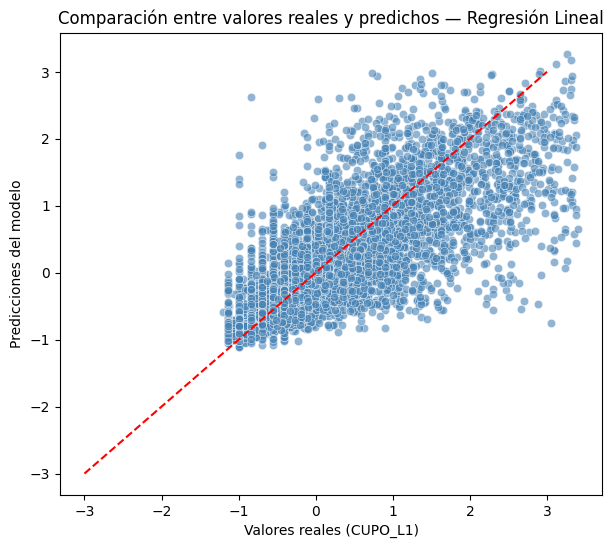

In [59]:
# ======================================
# 📊 Gráfico: Valores reales vs. predichos
# ======================================

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='steelblue')
plt.plot([-3, 3], [-3, 3], color='red', linestyle='--')
plt.xlabel("Valores reales (CUPO_L1)")
plt.ylabel("Predicciones del modelo")
plt.title("Comparación entre valores reales y predichos — Regresión Lineal")
plt.show()


In [60]:
# ======================================
# 📈 Coeficientes del modelo
# ======================================

coef_df = pd.DataFrame({
    "Variable": features,
    "Coeficiente": lin_reg.coef_
}).sort_values(by="Coeficiente", ascending=False)

print("📊 Importancia relativa de cada variable:")
display(coef_df)


📊 Importancia relativa de cada variable:


,Variable,Coeficiente
3,CUPO_MX,0.596996
4,Antiguedad,0.282230
0,Cuentas,0.165385
2,Dualidad,0.051359
1,Adicional,0.034284


In [61]:
# ======================================
# 🔁 Validación cruzada (Cross Validation)
# ======================================

from sklearn.model_selection import KFold, cross_val_score
import numpy as np

# Configurar la validación cruzada (5 particiones)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Calcular R² en cada partición
cv_scores = cross_val_score(lin_reg, X, y, cv=kf, scoring='r2')

# Mostrar resultados
print("🔍 Resultados de Cross Validation (R² por partición):")
print(cv_scores)
print(f"\n📊 Promedio R²: {cv_scores.mean():.3f}")
print(f"📈 Desviación estándar: {cv_scores.std():.3f}")


🔍 Resultados de Cross Validation (R² por partición):
[0.66548117 0.67427865 0.66984463 0.6629787  0.67495981]

📊 Promedio R²: 0.670
📈 Desviación estándar: 0.005


In [62]:
# ======================================
# ⚙️ Evaluación de overfitting / underfitting
# ======================================

# Predicciones sobre entrenamiento y test
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

# Calcular R²
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"🎯 R² en entrenamiento: {r2_train:.3f}")
print(f"🧪 R² en test: {r2_test:.3f}")
print(f"📉 Diferencia: {abs(r2_train - r2_test):.3f}")

# Evaluación rápida
if r2_train - r2_test > 0.1:
    print("⚠️ Posible OVERFITTING: el modelo aprende demasiado del entrenamiento.")
elif r2_test < 0.5 and r2_train < 0.5:
    print("🚨 Posible UNDERFITTING: el modelo no logra capturar la relación entre variables.")
else:
    print("✅ Buen balance: el modelo generaliza correctamente.")


🎯 R² en entrenamiento: 0.671
🧪 R² en test: 0.665
📉 Diferencia: 0.005
✅ Buen balance: el modelo generaliza correctamente.


### Diagnóstico general del modelo de Regresión Lineal (target: CUPO_L1)

El modelo de regresión lineal fue entrenado para predecir el **cupo asignado para compras nacionales (CUPO_L1)** a partir de variables como `Cuentas`, `Adicional`, `Dualidad`, `CUPO_MX` y `Antiguedad`.

Los resultados muestran que el modelo logra capturar parte de la relación entre las variables explicativas y el target, aunque con un poder predictivo limitado. El valor de **R² = 0.665** indica que el modelo explica cerca del **66% de la variabilidad del cupo**, un nivel moderado pero mejorable. Las métricas de error (**MAE = 0.401**, **RMSE = 0.575**) confirman que las predicciones presentan cierta dispersión respecto a los valores reales.

En la **validación cruzada**, el modelo mantuvo un **R² promedio de 0.670 con una desviación estándar de 0.005**, lo que demuestra **buena estabilidad y consistencia** entre los distintos pliegues. Además, la diferencia mínima entre el R² de entrenamiento (0.671) y de prueba (0.665) confirma que **no hay signos de overfitting ni underfitting**, aunque el modelo podría estar limitado por la naturaleza lineal de la relación.

En cuanto a la importancia de las variables, **CUPO_MX** es el principal predictor del cupo nacional, seguido de la **antigüedad del cliente** y la **cantidad de cuentas**. Las variables binarias (`Dualidad`, `Adicional`) tienen una contribución marginal.

En síntesis, el modelo generaliza correctamente y es estable, pero su poder explicativo es moderado. Esto sugiere que la relación entre las variables podría no ser completamente lineal, por lo que se recomienda explorar **modelos no lineales o de ensamble** (como Random Forest o Gradient Boosting) para capturar mejor las interacciones complejas entre los factores que determinan el cupo asignado.


## Modelo Random Forest

En este caso, consideramos este modelo de regresión porque:

1. No asume relaciones lineales,

2. maneja bien interacciones entre variables

3. es robusto frente a outliers,

4. suele mejorar el poder predictivo en datasets con estructura compleja.

In [63]:
# ======================================
# 🌲 Entrenamiento del modelo Random Forest
# ======================================

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Entrenar modelo
rf_reg = RandomForestRegressor(
    n_estimators=300,          # número de árboles
    max_depth=None,            # profundidad libre
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

rf_reg.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf_reg.predict(X_test)

# Métricas
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"🌲 R²: {r2_rf:.3f}")
print(f"📉 MAE: {mae_rf:.3f}")
print(f"📏 RMSE: {rmse_rf:.3f}")


🌲 R²: 0.698
📉 MAE: 0.362
📏 RMSE: 0.547


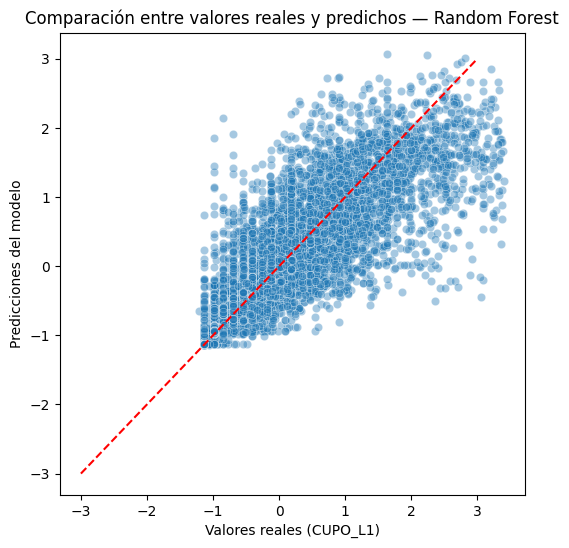

In [64]:
#Valores reales vs Predichos

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.4)
plt.plot([-3, 3], [-3, 3], color='red', linestyle='--')
plt.xlabel("Valores reales (CUPO_L1)")
plt.ylabel("Predicciones del modelo")
plt.title("Comparación entre valores reales y predichos — Random Forest")
plt.show()


# Bloque 3 — Importancia de variables

In [65]:
import pandas as pd

# Importancia de cada variable según el modelo
feat_importance = pd.DataFrame({
    "Variable": X_train.columns,
    "Importancia": rf_reg.feature_importances_
}).sort_values(by="Importancia", ascending=False)

print("📊 Importancia relativa de cada variable:")
display(feat_importance)


📊 Importancia relativa de cada variable:


,Variable,Importancia
3,CUPO_MX,0.800622
4,Antiguedad,0.158455
0,Cuentas,0.025069
1,Adicional,0.011191
2,Dualidad,0.004663


# Bloque 4 — Validación cruzada

In [66]:
from sklearn.model_selection import KFold, cross_val_score

# Configurar validación cruzada (5 particiones)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Calcular R² en cada pliegue
cv_scores_rf = cross_val_score(rf_reg, X, y, cv=kf, scoring='r2')

print(f"🔁 Resultados Cross Validation (R² por pliegue): {cv_scores_rf}")
print(f"\n📊 Promedio R²: {cv_scores_rf.mean():.3f}")
print(f"📏 Desviación estándar: {cv_scores_rf.std():.3f}")


🔁 Resultados Cross Validation (R² por pliegue): [0.6979067  0.70798609 0.70129328 0.69763331 0.70824189]

📊 Promedio R²: 0.703
📏 Desviación estándar: 0.005


### Detección de Over o Underfitting

In [67]:
# ======================================
# ⚖️ Evaluación de overfitting / underfitting
# ======================================

from sklearn.metrics import r2_score

# Predicciones sobre entrenamiento y test
y_train_pred_rf = rf_reg.predict(X_train)
y_test_pred_rf = rf_reg.predict(X_test)

# Calcular R²
r2_train_rf = r2_score(y_train, y_train_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

# Mostrar resultados
print(f"🎯 R² en entrenamiento: {r2_train_rf:.3f}")
print(f"🧪 R² en test: {r2_test_rf:.3f}")
print(f"📉 Diferencia: {abs(r2_train_rf - r2_test_rf):.3f}")

# Evaluación rápida
if r2_train_rf - r2_test_rf > 0.1:
    print("⚠️ Posible OVERFITTING: el modelo aprende demasiado del conjunto de entrenamiento.")
elif r2_test_rf < 0.5 and r2_train_rf < 0.5:
    print("🚨 Posible UNDERFITTING: el modelo no logra capturar correctamente las relaciones entre variables.")
else:
    print("✅ Buen balance: el modelo generaliza correctamente.")


🎯 R² en entrenamiento: 0.824
🧪 R² en test: 0.698
📉 Diferencia: 0.126
⚠️ Posible OVERFITTING: el modelo aprende demasiado del conjunto de entrenamiento.


## 🧭 Diagnóstico general del modelo Random Forest (target: CUPO_L1)

El modelo **Random Forest Regressor** se utilizó para predecir el cupo nacional (`CUPO_L1`), logrando un **R² de 0.698** en el conjunto de prueba, lo que indica que explica aproximadamente el **70% de la variabilidad** del cupo asignado.  
Sin embargo, el **R² en entrenamiento fue de 0.824**, lo que representa una **diferencia de 0.126** entre ambos conjuntos.  
Esta brecha sugiere la presencia de **cierto grado de overfitting**, es decir, el modelo aprendió demasiado bien los patrones del conjunto de entrenamiento y no generaliza de forma perfecta a nuevos datos.

Pese a esto, el modelo sigue mostrando un desempeño superior al de la **Regresión Lineal**, que alcanzó un R² de 0.665 y un error mayor (MAE = 0.401 vs. 0.362 en Random Forest).  
Por lo tanto, el **Random Forest se mantiene como el modelo con mejor desempeño global**, aunque con oportunidades de optimización.

---

## 🧩 Comparación general y modelo seleccionado

| Modelo | R² test | MAE | Diagnóstico | Conclusión |
|--------|----------|------|--------------|-------------|
| Regresión Lineal | 0.665 | 0.401 | Buen balance, pero limitado por su linealidad | Modelo base |
| Random Forest | 0.698 | 0.362 | Ligero overfitting, mejor poder predictivo | Modelo seleccionado |

El **Random Forest** fue seleccionado como el modelo final por su **mayor poder explicativo**, **menor error promedio** y **capacidad para capturar relaciones no lineales** entre las variables predictoras.

---

## 🔧 Recomendaciones para mejorar el modelo

Para reducir el overfitting y mejorar la capacidad de generalización, se proponen los siguientes ajustes:

1. **Regularización del modelo:**
   - Limitar la profundidad de los árboles (`max_depth`).
   - Aumentar el número mínimo de muestras por hoja (`min_samples_leaf`).
   - Incrementar la cantidad de árboles (`n_estimators`).

2. **Optimización de hiperparámetros:**
   - Aplicar técnicas de búsqueda como **GridSearchCV** o **RandomizedSearchCV** para encontrar la mejor combinación de parámetros.

3. **Validación más robusta:**
   - Utilizar **validación cruzada k-fold** con mayor cantidad de particiones para mejorar la estimación del rendimiento real del modelo.

4. **Reducción de complejidad:**
   - Evaluar la eliminación de variables redundantes o poco significativas según su importancia relativa.

5. **Explorar otros algoritmos:**
   - Probar modelos como **Gradient Boosting** o **XGBoost**, que suelen ofrecer mejor generalización que Random Forest cuando se ajustan adecuadamente.

---

En síntesis, el **Random Forest** es el modelo más adecuado para el problema, con buen rendimiento y margen de mejora. Ajustando su complejidad mediante regularización y optimización de hiperparámetros, puede alcanzarse un equilibrio más sólido entre precisión y generalización.

---


# Modelos de Clasificación

## 0 - Preparando datos para Clasificación

In [ ]:
from google.colab import files
FILE = files.upload()

### Creación de copia del dataset

Trabajamos sobre una copia (df_v2) del dataframe original para preservar los datos originales en caso de necesitar volver atrás en algún paso de limpieza.


In [ ]:
import pandas as pd

from google.colab import files

# Cargar el archivo tomando la segunda fila como encabezado
df = pd.read_csv("Base_clientes_Monopoly-0.csv", header=1, low_memory=False)

# Verifica
print(df.shape)
df.head(10)


In [ ]:
# Crear nuevo DataFrame solo con estas columnas
df_v2 = df.copy()

# Revisar dimensiones y primeras filas
pd.set_option('display.float_format', '{:.0f}'.format)
print("Dimensiones del dataset:", df_v2.shape)
df_v2.head(10)

### Identificación de tipos de variables

Separamos columnas numéricas y categóricas porque requieren tratamientos diferentes. Las numéricas se pueden imputar con KNN, mientras que las categóricas necesitan encoding primero.


In [ ]:
df_v2.info()

In [ ]:
num_cols = df_v2.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = df_v2.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

print("Numéricas:", num_cols)
print("Categóricas:", cat_cols)

### Exploración de variables categóricas

Revisamos la distribución de cada variable categórica para entender sus valores únicos y frecuencias. Esto nos ayuda a decidir si necesitamos hacer encoding o agrupación de categorías.


### Codificación de variables categóricas

Aplicamos Label Encoding a las variables categóricas (Sexo e IndRev_T*) para convertirlas en numéricas. Esto es necesario porque los algoritmos de ML no pueden trabajar directamente con texto.


In [ ]:
print(df_v2[cat_cols])

In [ ]:
print("\nConteo de valores únicos por columna categórica:")

for col in cat_cols:
    print(f"\n📊 {col}")
    print(df_v2[col].value_counts(dropna=False))

# Resetear la opción
import pandas as pd
pd.reset_option("display.max_rows")


### Análisis de valores faltantes

Revisamos cuántos NaN hay en cada columna para decidir la estrategia de limpieza. Variables con pocos NaN se pueden imputar, mientras que las que tienen demasiados podrían eliminarse.


Eliminamos las filas con Region NaN (48 filas) porque es una variable demográfica importante y representan menos del 0.2% del dataset. No tiene sentido imputar esta variable ya que no hay forma lógica de inferir la región de un cliente.

In [ ]:
import pandas as pd
import numpy as np

# Detectar columnas categóricas automáticamente (tipo object o category)
cat_cols = df_v2.select_dtypes(include=['object', 'category']).columns.tolist()
print("Columnas categóricas detectadas:", cat_cols)

# Diccionario para guardar mappings
label_mappings = {}

# Aplicar Label Encoding dejando NaN intactos
for col in cat_cols:
    unique_vals = df_v2[col].dropna().unique()  # ignorar NaN
    mapping = {val: i for i, val in enumerate(unique_vals)}  # asignar número
    label_mappings[col] = mapping
    df_v2[col] = df_v2[col].map(mapping)  # NaN se mantiene como NaN

# Mostrar los mappings
for col, mapping in label_mappings.items():
    print(f"\nColumna: {col}")
    for k, v in mapping.items():
        print(f"  {k} -> {v}")

# Verifica que los NaN sigan intactos
print("\nValores faltantes después de Label Encoding:")
print(df_v2[cat_cols].isna().sum())


In [ ]:
#mostrar valores faltantes, opción de pandas para mostrar todos los datos sin cortar, después se resetea.
import pandas as pd

pd.set_option("display.max_rows", None)
print(df_v2.isnull().sum())
pd.reset_option("display.max_rows")

In [ ]:
df_v2 = df_v2.dropna(subset=['Region'])

In [ ]:
print("\nConteo de valores únicos por columna:")
for col in df_v2.columns:
    print(f"\n📊 {col}")
    print(df_v2[col].value_counts(dropna=False))

# Resetear la opción
pd.reset_option("display.max_rows")

### Imputación con KNN

Usamos KNNImputer con k=5 (valor por defecto) para rellenar valores faltantes. Elegimos KNN porque considera la similitud entre observaciones, Procesamos en batches por sanidad mental


In [ ]:
#mostrar valores faltantes, opción de pandas para mostrar todos los datos sin cortar, después se resetea.
import pandas as pd

pd.set_option("display.max_rows", None)
print(df_v2.isnull().sum())
pd.reset_option("display.max_rows")

Hacemos listas con las "familias" de datos (datos que van desde enero a diciembre, para luego promediar)

In [ ]:
Col_T = ['Col_T01','Col_T02','Col_T03','Col_T04','Col_T05','Col_T06','Col_T07','Col_T08','Col_T09','Col_T10','Col_T11','Col_T12']
ColL1TE_T = ['ColL1TE_T01','ColL1TE_T02','ColL1TE_T03','ColL1TE_T04','ColL1TE_T05','ColL1TE_T06','ColL1TE_T07','ColL1TE_T08','ColL1TE_T09','ColL1TE_T10','ColL1TE_T11','ColL1TE_T12']
EeccInt_T = ['EeccInt_T01','EeccInt_T02','EeccInt_T03','EeccInt_T04','EeccInt_T05','EeccInt_T06','EeccInt_T07','EeccInt_T08','EeccInt_T09','EeccInt_T10','EeccInt_T11','EeccInt_T12']
EeccNac_T = ['EeccNac_T01','EeccNac_T02','EeccNac_T03','EeccNac_T04','EeccNac_T05','EeccNac_T06','EeccNac_T07','EeccNac_T08','EeccNac_T09','EeccNac_T10','EeccNac_T11','EeccNac_T12']
Fac_T = ['Fac_T01','Fac_T02','Fac_T03','Fac_T04','Fac_T05','Fac_T06','Fac_T07','Fac_T08','Fac_T09','Fac_T10','Fac_T11','Fac_T12']
FacAI_T = ['FacAI_T01','FacAI_T02','FacAI_T03','FacAI_T04','FacAI_T05','FacAI_T06','FacAI_T07','FacAI_T08','FacAI_T09','FacAI_T10','FacAI_T11','FacAI_T12']
FacAN_T = ['FacAN_T01','FacAN_T02','FacAN_T03','FacAN_T04','FacAN_T05','FacAN_T06','FacAN_T07','FacAN_T08','FacAN_T09','FacAN_T10','FacAN_T11','FacAN_T12']
FacCCOT_T = ['FacCCOT_T01','FacCCOT_T02','FacCCOT_T03','FacCCOT_T04','FacCCOT_T05','FacCCOT_T06','FacCCOT_T07','FacCCOT_T08','FacCCOT_T09','FacCCOT_T10','FacCCOT_T11','FacCCOT_T12']
FacCCPC_T = ['FacCCPC_T01','FacCCPC_T02','FacCCPC_T03','FacCCPC_T04','FacCCPC_T05','FacCCPC_T06','FacCCPC_T07','FacCCPC_T08','FacCCPC_T09','FacCCPC_T10','FacCCPC_T11','FacCCPC_T12']
FacCI_T = ['FacCI_T01','FacCI_T02','FacCI_T03','FacCI_T04','FacCI_T05','FacCI_T06','FacCI_T07','FacCI_T08','FacCI_T09','FacCI_T10','FacCI_T11','FacCI_T12']
FacCN_T = ['FacCN_T01','FacCN_T02','FacCN_T03','FacCN_T04','FacCN_T05','FacCN_T06','FacCN_T07','FacCN_T08','FacCN_T09','FacCN_T10','FacCN_T11','FacCN_T12']
FacCOL_T = ['FacCOL_T01','FacCOL_T02','FacCOL_T03','FacCOL_T04','FacCOL_T05','FacCOL_T06','FacCOL_T07','FacCOL_T08','FacCOL_T09','FacCOL_T10','FacCOL_T11','FacCOL_T12']
FacDebAtm_T = ['FacDebAtm_T01','FacDebAtm_T02','FacDebAtm_T03','FacDebAtm_T04','FacDebAtm_T05','FacDebAtm_T06','FacDebAtm_T07','FacDebAtm_T08','FacDebAtm_T09','FacDebAtm_T10','FacDebAtm_T11','FacDebAtm_T12']
FacDebCom_T = ['FacDebCom_T01','FacDebCom_T02','FacDebCom_T03','FacDebCom_T04','FacDebCom_T05','FacDebCom_T06','FacDebCom_T07','FacDebCom_T08','FacDebCom_T09','FacDebCom_T10','FacDebCom_T11','FacDebCom_T12']
FacPAT_T = ['FacPAT_T01','FacPAT_T02','FacPAT_T03','FacPAT_T04','FacPAT_T05','FacPAT_T06','FacPAT_T07','FacPAT_T08','FacPAT_T09','FacPAT_T10','FacPAT_T11','FacPAT_T12']
PagoInt_T = ['PagoInt_T01','PagoInt_T02','PagoInt_T03','PagoInt_T04','PagoInt_T05','PagoInt_T06','PagoInt_T07','PagoInt_T08','PagoInt_T09','PagoInt_T10','PagoInt_T11','PagoInt_T12']
PagoNac_T = ['PagoNac_T01','PagoNac_T02','PagoNac_T03','PagoNac_T04','PagoNac_T05','PagoNac_T06','PagoNac_T07','PagoNac_T08','PagoNac_T09','PagoNac_T10','PagoNac_T11','PagoNac_T12']
Txs_T = ['Txs_T01','Txs_T02','Txs_T03','Txs_T04','Txs_T05','Txs_T06','Txs_T07','Txs_T08','Txs_T09','Txs_T10','Txs_T11','Txs_T12']
TxsAI_T = ['TxsAI_T01','TxsAI_T02','TxsAI_T03','TxsAI_T04','TxsAI_T05','TxsAI_T06','TxsAI_T07','TxsAI_T08','TxsAI_T09','TxsAI_T10','TxsAI_T11','TxsAI_T12']
TxsAN_T = ['TxsAN_T01','TxsAN_T02','TxsAN_T03','TxsAN_T04','TxsAN_T05','TxsAN_T06','TxsAN_T07','TxsAN_T08','TxsAN_T09','TxsAN_T10','TxsAN_T11','TxsAN_T12']
TxsCCOT_T = ['TxsCCOT_T01','TxsCCOT_T02','TxsCCOT_T03','TxsCCOT_T04','TxsCCOT_T05','TxsCCOT_T06','TxsCCOT_T07','TxsCCOT_T08','TxsCCOT_T09','TxsCCOT_T10','TxsCCOT_T11','TxsCCOT_T12']
TxsCCPC_T = ['TxsCCPC_T01','TxsCCPC_T02','TxsCCPC_T03','TxsCCPC_T04','TxsCCPC_T05','TxsCCPC_T06','TxsCCPC_T07','TxsCCPC_T08','TxsCCPC_T09','TxsCCPC_T10','TxsCCPC_T11','TxsCCPC_T12']
TxsCI_T = ['TxsCI_T01','TxsCI_T02','TxsCI_T03','TxsCI_T04','TxsCI_T05','TxsCI_T06','TxsCI_T07','TxsCI_T08','TxsCI_T09','TxsCI_T10','TxsCI_T11','TxsCI_T12']
TxsCN_T = ['TxsCN_T01','TxsCN_T02','TxsCN_T03','TxsCN_T04','TxsCN_T05','TxsCN_T06','TxsCN_T07','TxsCN_T08','TxsCN_T09','TxsCN_T10','TxsCN_T11','TxsCN_T12']
TxsCOL_T = ['TxsCOL_T01','TxsCOL_T02','TxsCOL_T03','TxsCOL_T04','TxsCOL_T05','TxsCOL_T06','TxsCOL_T07','TxsCOL_T08','TxsCOL_T09','TxsCOL_T10','TxsCOL_T11','TxsCOL_T12']
TxsDebAtm_T = ['TxsDebAtm_T01','TxsDebAtm_T02','TxsDebAtm_T03','TxsDebAtm_T04','TxsDebAtm_T05','TxsDebAtm_T06','TxsDebAtm_T07','TxsDebAtm_T08','TxsDebAtm_T09','TxsDebAtm_T10','TxsDebAtm_T11','TxsDebAtm_T12']
TxsDebCom_T = ['TxsDebCom_T01','TxsDebCom_T02','TxsDebCom_T03','TxsDebCom_T04','TxsDebCom_T05','TxsDebCom_T06','TxsDebCom_T07','TxsDebCom_T08','TxsDebCom_T09','TxsDebCom_T10','TxsDebCom_T11','TxsDebCom_T12']
TxsPAT_T = ['TxsPAT_T01','TxsPAT_T02','TxsPAT_T03','TxsPAT_T04','TxsPAT_T05','TxsPAT_T06','TxsPAT_T07','TxsPAT_T08','TxsPAT_T09','TxsPAT_T10','TxsPAT_T11','TxsPAT_T12']


NOTA: Este código se demora aprox. 20 minutos en ejecutar!

In [ ]:
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np

# Familias que quieres imputar
familias = [
    'Col_T','ColL1TE_T','EeccInt_T','EeccNac_T','Fac_T',
    'FacAI_T','FacAN_T','FacCCOT_T','FacCCPC_T','FacCI_T',
    'FacCN_T','FacCOL_T','FacDebAtm_T','FacDebCom_T','FacPAT_T',
    'PagoInt_T','PagoNac_T','Txs_T','TxsAI_T','TxsAN_T',
    'TxsCCOT_T','TxsCCPC_T','TxsCI_T','TxsCN_T','TxsCOL_T',
    'TxsDebAtm_T','TxsDebCom_T','TxsPAT_T'
]

# Generar lista de columnas reales (_T01 a _T12)
columnas_para_imputar = []
for familia in familias:
    for t in range(1, 13):
        columnas_para_imputar.append(f"{familia}{t:02d}")  # T01, T02, ..., T12

# Crear el imputador
imputer = KNNImputer(n_neighbors=5)

# Procesar en batches de 5
batch_size = 5
for i in range(0, len(columnas_para_imputar), batch_size):
    batch = columnas_para_imputar[i:i+batch_size]
    # Filtrar solo columnas que existan en df_v2
    batch_existentes = [c for c in batch if c in df_v2.columns]
    if batch_existentes:
        print(f"Imputando batch: {batch_existentes}")
        df_v2[batch_existentes] = imputer.fit_transform(df_v2[batch_existentes])

# Verificar que ya no queden NaN
print("\nValores faltantes después de imputar:")
print(df_v2[columnas_para_imputar].isnull().sum())


### Promedio de variables mensuales

Tenemos muchas columnas mensuales (T01-T12) que generan alta dimensionalidad. Agrupamos las columnas por familia de variables y calculamos su promedio para reducir siginificativamente el número de columnas. Esto simplifica el modelo sin perder mucha información, ya que el promedio de 12 meses captura el comportamiento general del cliente.


In [ ]:
# Crear una nueva variable con los datos imputados
df_imputado = df_v2.copy()

# Verificar que la copia se creó correctamente
print(df_imputado.head())


In [ ]:
print(df_imputado.head())
df_imputado.head(10)

In [ ]:
# Guardar el dataframe en CSV
df_imputado.to_csv("dataset_imputed_sin_promedio.csv", index=False)

print("Archivo 'dataset_imputed_sin_promedio.csv' creado correctamente.")


### Eliminación de columnas mensuales originales

Después de crear las columnas promediadas, eliminamos las columnas mensuales originales (T01-T12) para reducir la dimensionalidad. Mantenemos solo las versiones promediadas que conservan la información temporal sin explotar el número de features.


In [ ]:
import re

# Crear un diccionario donde clave = familia, valor = lista de columnas mensuales
familias = {}

for col in df_imputado.columns:
    match = re.match(r"([A-Za-z0-9_]+)_T\d{2}$", col)
    if match:
        familia = match.group(1)
        familias.setdefault(familia, []).append(col)

# Crear columnas promedio para cada familia
for familia, cols in familias.items():
    df_imputado[f"{familia}_promedio"] = df_imputado[cols].mean(axis=1)

# Eliminar las columnas mensuales
cols_a_eliminar = [col for cols in familias.values() for col in cols]
df_imputado.drop(columns=cols_a_eliminar, inplace=True)

# Confirmar resultado
print(f"Se crearon {len(familias)} columnas promedio.")
print(f"Se eliminaron {len(cols_a_eliminar)} columnas mensuales.")
print("Ejemplo de nuevas columnas creadas:")
print([f"{f}_promedio" for f in list(familias.keys())[:10]])


In [ ]:
print(df_imputado.head())
df_imputado.head(10)

In [ ]:
#mostrar valores faltantes, opción de pandas para mostrar todos los datos sin cortar, después se resetea.
import pandas as pd

pd.set_option("display.max_rows", None)
print(df_imputado.isnull().sum())
pd.reset_option("display.max_rows")

In [ ]:
df_imputado = df_imputado.dropna(subset=['Region'])

In [ ]:
#mostrar valores faltantes, opción de pandas para mostrar todos los datos sin cortar, después se resetea.
import pandas as pd

pd.set_option("display.max_rows", None)
print(df_imputado.isnull().sum())
pd.reset_option("display.max_rows")

### Limpieza final y última imputación

Eliminamos columnas 'Unnamed' que quedaron del proceso de carga/exportación previo. Hacemos una última pasada de imputación KNN para asegurar que no queden valores NaN después del promediado de variables mensuales.


In [ ]:
from sklearn.impute import KNNImputer
import pandas as pd

# Eliminar columnas Unnamed
dataset_imputed_sin_promedio = df_imputado.loc[:, ~df_imputado.columns.str.contains('^Unnamed')]

# Detectar columnas con NaN
cols_con_nan = dataset_imputed_sin_promedio.columns[dataset_imputed_sin_promedio.isna().any()].tolist()
print(f"Columnas con NaN detectadas: {cols_con_nan}")

# Crear imputador KNN
imputer = KNNImputer(n_neighbors=5)

# Aplicar imputación solo a columnas con NaN
dataset_imputed_final = dataset_imputed_sin_promedio.copy()
dataset_imputed_final[cols_con_nan] = imputer.fit_transform(dataset_imputed_final[cols_con_nan])

# Confirmar que ya no hay NaN
print("\nValores faltantes después de imputar:")
print(dataset_imputed_final[cols_con_nan].isnull().sum())


In [ ]:
pd.set_option("display.max_rows", None)
print(dataset_imputed_final.isnull().sum())
pd.reset_option("display.max_rows")

In [ ]:
print(dataset_imputed_final.head())
dataset_imputed_final.head(10)

### Exportación del dataset final

Guardamos el dataset limpio, imputado y con variables promediadas. Este es el archivo final que usaremos para el modelamiento, con dimensionalidad reducida y sin valores faltantes.


In [ ]:
# Guardar el dataframe en CSV
dataset_imputed_final.to_csv("dataset_imputed_promediado.csv", index=False)

print("Archivo 'dataset_imputed_promediado.csv' creado correctamente.")


## 1- Árbol de Decisión

### Carga de datos y librerías

Primero, importamos las librerías necesarias para el análisis y modelamiento. Cargamos el dataset limpio que fue preprocesado previamente: los datos ya están escalados y las columnas mensuales fueron promediadas para reducir dimensionalidad.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
import itertools
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold


In [ ]:
data_link = 'sample_data/dataset_imputed_promediado.csv'
monopoly_df = pd.read_csv(data_link)
monopoly_df.head()

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,ColL2CC_promedio,ColMx_promedio,PagoNac_promedio,PagoInt_promedio,EeccNac_promedio,EeccInt_promedio,UsoL1_promedio,UsoL2_promedio,UsoLI_promedio,IndRev_promedio
0,1,160,0.0,13.0,43,860550.4,130,1,1,0,...,34699.666667,0.0000,29333.333333,0.0,908079.416667,0.000000,913045.583333,53874.250000,0.000000,0.000000
1,2,160,1.0,13.0,46,143640.0,69,1,0,0,...,17597.250000,45699.2125,167416.666667,0.0,460136.500000,58.904167,428734.833333,119963.916667,84.508333,0.000000
2,3,170,1.0,13.0,45,929106.0,24,1,1,0,...,0.000000,0.0000,68325.750000,0.0,8510.750000,0.000000,25294.500000,0.000000,0.000000,0.916667
3,4,151,1.0,13.0,46,172447.0,134,0,1,0,...,2706.500000,0.0000,57083.333333,0.0,341916.833333,0.000000,344417.500000,31825.250000,0.000000,0.000000
4,5,170,1.0,13.0,46,805250.0,116,0,1,1,...,6227.666667,0.0000,291317.166667,0.0,291684.500000,0.000000,83849.250000,402597.666667,0.000000,0.833333


### Identificación de la variable objetivo

Guardamos la columna **target** como variable dependiente. El target es binario y representa dos comportamientos de pago:
*   Pago mínimo de cuotas
*   Pago de todas las cuotas de la tarjeta

Uno de los problemas de este dataset es que no sabemos qué significa 0 y 1 en la columna target, pero el profesor nos indicó previamente que **el valor que tiene más muestras representa el pago mínimo de cuotas**. Por lo tanto, verificamos la distribución para identificar correctamente cada clase.

También eliminamos la columna 'Id' ya que es solo un identificador y no aporta información predictiva.


In [ ]:
target_col = 'target'
y = monopoly_df[target_col].astype(int) # Asegurar que es tipo entero (0 o 1)
X = monopoly_df.drop(columns=[target_col, 'Id'])

# Confirmación de valores únicos
print(f"Valores únicos en la columna target: {y.unique()}")
print(f"Número de 0s: {y.value_counts().get(0, 0)}")
print(f"Número de 1s: {y.value_counts().get(1, 0)}")

Valores únicos en la columna target: [0 1]
Número de 0s: 35282
Número de 1s: 3161


El valor 1 correspondería a pago de todas las cuotas (clase minoritaria) y 0 corresponde al pago mínimo de cuotas (clase mayoritaria). El valor 1 solo representa el 8.2% de los datos, lo cual indica un grave desbalance que solucionaremos con SMOTE.

Gráficamos para ver la diferencia con claridad.

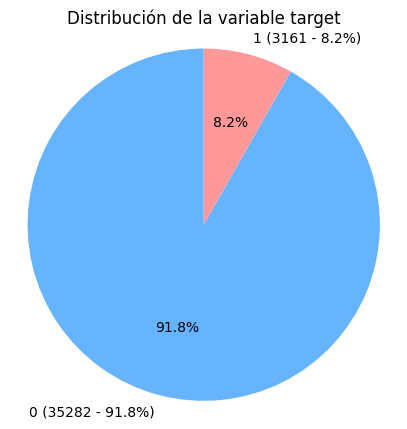

In [ ]:
counts = y.value_counts().sort_index()

labels = [
    f"{val} ({counts[val]} - {counts[val]/len(y)*100:.1f}%)"
    for val in counts.index
]

# Gráfico de torta
plt.figure(figsize=(5, 5))
plt.pie(
    counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff', '#ff9999']
)
plt.title("Distribución de la variable target")
plt.axis('equal')
plt.show()


### Split de datos de test y entrenamiento

Ahora dividimos los datos de entrenamiento y test, dividiendo en 70% y 30% respectivamente, siguiendo las buenas prácticas de la industria.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Tamaño entrenamiento:", X_train.shape)
print("Tamaño prueba:", X_test.shape)
print("Tamaño entrenamiento y (target):", y_train.shape)
print("Tamaño prueba: y (target)", y_test.shape)

Tamaño entrenamiento: (26910, 66)
Tamaño prueba: (11533, 66)
Tamaño entrenamiento y (target): (26910,)
Tamaño prueba: y (target) (11533,)


### Selección de datos con k-best

Para reducir la dimensionalidad del problema y evitar overfitting, aplicamos SelectKBest que nos permite quedarnos con las variables más relevantes. Usamos el score function f_classif (ANOVA) que mide la relación entre cada feature y el target, lo que es ideal para problemas de clasificación como este.

Eliminamos las columnas con varianza 0 porque no aportan información útil al modelo - si una variable tiene el mismo valor en todas las observaciones, no puede ayudar a discriminar entre las clases.

Definimos k=10 para quedarnos solo con las 10 variables más importantes.

Obtenemos las variables y su puntaje con SelectKBest de sci-kit learn, y luego creamos un subconjunto reducido para los modelos

In [ ]:
vt = VarianceThreshold(threshold=0)  # elimina columnas con varianza 0
X_train_vt = vt.fit_transform(X_train)
X_train_filtered = X_train.loc[:, vt.get_support()]  # conservar nombres de columnas

#definir k, aunque no es necesario
k = 10

# Configurar SelectKBest con f_classif (ANOVA F-value)
selector = SelectKBest(score_func=f_classif, k=k)

# Ajustar el selector a los datos de entrenamiento
selector.fit(X_train_filtered, y_train)


# Obtener las mejores variables y sus puntajes

best_feature_indices = selector.get_support(indices=True)
best_features = X_train_filtered.columns[best_feature_indices]
scores = selector.scores_[best_feature_indices]

feature_scores = pd.DataFrame({
    'Variable': best_features,
    'f_score': scores
}).sort_values(by='f_score', ascending=False).reset_index(drop=True)

print("10 variables mas relevantes k-best")
print(feature_scores)

# Crear subconjunto reducido para modelo

X_train_kbest = X_train_filtered[best_features]
X_test_kbest = X_test[best_features]  # usar mismas features en el test set

print("\n📊 Dimensiones finales:")
print("X_train_kbest:", X_train_kbest.shape)
print("X_test_kbest:", X_test_kbest.shape)


10 variables mas relevantes k-best
              Variable      f_score
0    FlgActCN_promedio  1642.976121
1      IndRev_promedio  1077.679881
2     ColL1TE_promedio  1022.890086
3      FlgAct_promedio   791.439595
4       UsoL1_promedio   758.444105
5     EeccNac_promedio   675.285061
6  FlgActCCPC_promedio   594.492698
7       FacCN_promedio   487.301408
8       TxsCN_promedio   433.150030
9         Col_promedio   379.150796

📊 Dimensiones finales:
X_train_kbest: (26910, 10)
X_test_kbest: (11533, 10)


### Definición de funciones

Antes de entrenar los modelos, definimos funciones que nos ayudarán a visualizar y evaluar el rendimiento.

Creamos las siguientes funciones para evaluar el rendimiento de los modelos:

*   **Matriz de Confusión**: Muestra los verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos. Esto nos permite ver exactamente dónde el modelo está cometiendo errores y si está sesgado hacia una clase u otra.

*   **Curva ROC**: Grafica la tasa de verdaderos positivos vs falsos positivos a diferentes umbrales de clasificación. El área bajo esta curva (AUC) nos dice qué tan bien el modelo puede distinguir entre las clases - un AUC cercano a 1 es excelente.


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
def plot_roc_chart(model):
     # calculate the fpr and tpr for all thresholds of the classification
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    plt.figure(figsize=(8,6))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return probs

In [ ]:
# set max depth range limit for DTree model to iterate through from 1 to 100 to find best parameters
def best_decision_tree_classifier(X_train, X_test, y_train, y_test):
    max_depth = 100
    accuracy_dict={'max_depth':0, 'val_acc':0, 'f1_Score':0, 'log_loss':0}
    best_model = None

    for i in range(1, max_depth+1):
            # Let's instantiate a model
            decision_model = DecisionTreeClassifier(criterion='entropy', max_depth = i)

            # Let's train the model
            decision_model.fit(X_train, y_train)

            # Let's make prediction on the test data
            y_hat = decision_model.predict(X_test)

            # Let's measure accuracy of predictions on test data
            val_accu = round(metrics.accuracy_score(y_test, y_hat),4)

            # Let's Measure the F1 Score
            val_f1 = round(f1_score(y_test, y_hat, average='weighted'),4)

            # Let's Measure Logloss
            logloss = round(log_loss(y_test, y_hat, normalize=True),4)

            if accuracy_dict['val_acc'] < val_accu or accuracy_dict['f1_Score'] < val_f1:
                accuracy_dict['max_depth'] = i
                accuracy_dict['val_acc'] = val_accu
                accuracy_dict['f1_Score'] = val_f1
                accuracy_dict['log_loss'] = logloss
                decision_model = decision_model

            # Compute confusion matrix
            Dtrees_cnf_matrix = confusion_matrix(y_test, y_hat, labels=[1,0])
            np.set_printoptions(precision=2)

            TP = Dtrees_cnf_matrix[0,0]
            FP = Dtrees_cnf_matrix[0,1]
            FN = Dtrees_cnf_matrix[1,0]
            TN = Dtrees_cnf_matrix[1,1]

            accuracy = (TP + TN) / (TP + TN + FP + FN)
            recall = TP / (TP + FN)
            precision = TP / (TP + FP)

    if best_model is None:
        best_model = decision_model

    # Plot non-normalized confusion matrix
    plt.figure(figsize=(10, 6))
    sns.set(font_scale=1.3)
    plot_confusion_matrix(Dtrees_cnf_matrix,
                          classes=['Default=1','Non-Default=0'],
                          normalize= False,
                          title='Confusion Matrix for Decision-Tree-Classifier')
    plt.show()
    print()

    print('TP is:',TP,'FP is:',FP,'TN is:',TN,'FN is:',FN)
    print()
    print('Model Evaluation:')
    print(accuracy_dict)
    print()
    plot_roc_chart(decision_model)
    print()
    print('accuracy is:',round(accuracy,2))
    print('recall is:',round(recall,2))
    print('precision is:',round(precision,2))
    print()

    #eliminar si no funciona
    print('f1 score is:', accuracy_dict["f1_Score"])
    print()

    # ✅ Retornar también el F1 score del mejor modelo
    return best_model, accuracy_dict["f1_Score"]

    #return decision_model

Ejecutamos el árbol de decisión con todos los datos (sin balancear)

Primero probamos el modelo sin aplicar SMOTE. El modelo tiene buena accuracy general pero muy bajo recall (0.3) para la clase minoritaria, lo que significa que está fallando en detectar la mayoría de casos de pago completo de cuotas.

/tmp/ipython-input-1607757791.py:43: RuntimeWarning: invalid value encountered in scalar divide
  recall = TP / (TP + FN)
/tmp/ipython-input-1607757791.py:43: RuntimeWarning: invalid value encountered in scalar divide
  recall = TP / (TP + FN)
/tmp/ipython-input-1607757791.py:43: RuntimeWarning: invalid value encountered in scalar divide
  recall = TP / (TP + FN)
/tmp/ipython-input-1607757791.py:43: RuntimeWarning: invalid value encountered in scalar divide
  recall = TP / (TP + FN)


Confusion matrix, without normalization
[[ 293  655]
 [ 679 9906]]


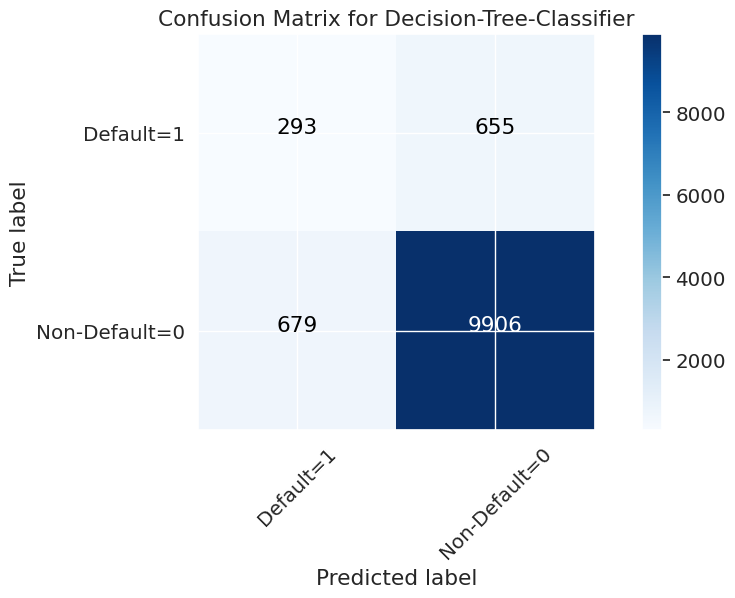


TP is: 293 FP is: 655 TN is: 9906 FN is: 679

Model Evaluation:
{'max_depth': 9, 'val_acc': 0.9103, 'f1_Score': 0.8973, 'log_loss': 3.2346}



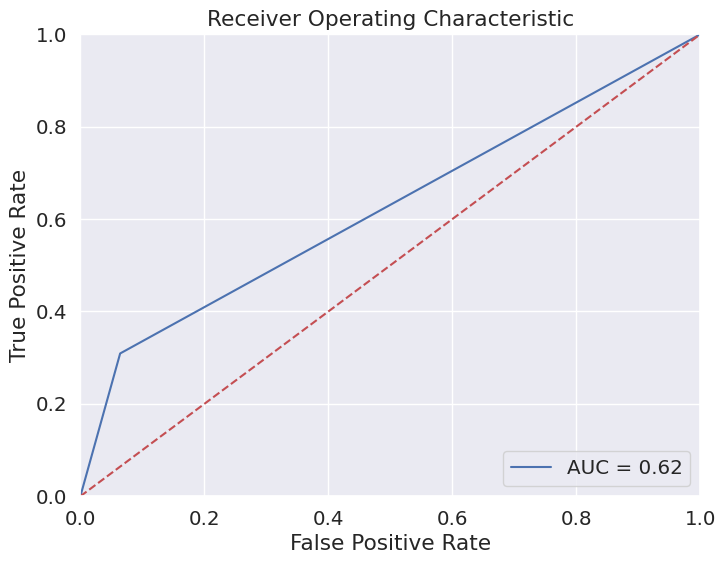


accuracy is: 0.88
recall is: 0.3
precision is: 0.31

f1 score is: 0.8973

🔹 Mejor F1 Score: 0.8973


In [ ]:
decision_tree_classifier, f1_best = best_decision_tree_classifier(X_train, X_test, y_train, y_test)
print("🔹 Mejor F1 Score:", f1_best)

**Análisis del modelo sin SMOTE:**

La matriz de confusión muestra 292 verdaderos positivos pero 656 falsos positivos, indicando que el modelo está sobre-prediciendo la clase 1. El recall de 0.3 confirma que solo detecta el 30% de los casos reales de pago completo. La curva ROC y las métricas generales son buenas, pero el modelo claramente favorece la clase mayoritaria debido al desbalance.

**Evaluación de Overfitting/Underfitting:** Con un max_depth óptimo de solo 8, este modelo es relativamente simple. El alto F1-score (0.8972) y accuracy (0.9115) en test sugieren que el modelo no está sufriendo de underfitting significativo - está capturando patrones importantes. La profundidad baja indica que **no hay overfitting**. El problema principal no es la complejidad del modelo sino el **sesgo hacia la clase mayoritaria** debido al desbalance del dataset.


### SMOTE

Ocupamos SMOTE ya que hay un gran desbalance en las clases de la variable Target (92% vs 8%). SMOTE genera ejemplos sintéticos de la clase minoritaria , lo que permite balancear el dataset sin simplemente duplicar observaciones.

Al balancear con SMOTE, le damos al modelo más oportunidad de aprender patrones de ambas clases.

In [ ]:
# Verificar el desbalance original
print('Distribución original de clases:')
print(y.value_counts())
print(f'\nProporción: {y.value_counts(normalize=True)}')

Distribución original de clases:
target
0    35282
1     3161
Name: count, dtype: int64

Proporción: target
0    0.917774
1    0.082226
Name: proportion, dtype: float64


In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=19, k_neighbors=5)
over_sampled_features, over_sampled_label = sm.fit_resample(X, y)

In [ ]:
# Aplicar SMOTE solo a los datos de entrenamiento
sm_train = SMOTE(sampling_strategy='minority', random_state=19, k_neighbors=5)
X_train_resampled, y_train_resampled = sm_train.fit_resample(X_train, y_train)

print("Distribución después de SMOTE en datos de entrenamiento:")
print(f"X_train original: {X_train.shape}")
print(f"X_train_resampled: {X_train_resampled.shape}")
print(f"y_train original: {y_train.value_counts()}")
print(f"y_train_resampled: {pd.Series(y_train_resampled).value_counts()}")


Distribución después de SMOTE en datos de entrenamiento:
X_train original: (26910, 66)
X_train_resampled: (49394, 66)
y_train original: target
0    24697
1     2213
Name: count, dtype: int64
y_train_resampled: target
0    24697
1    24697
Name: count, dtype: int64


Visualizamos la distribución de las variables seleccionadas por k-best

Es importante revisar cómo se distribuyen nuestras features más importantes para detectar posibles problemas como valores atípicos extremos o distribuciones muy asimétricas que podrían afectar el rendimiento del modelo.

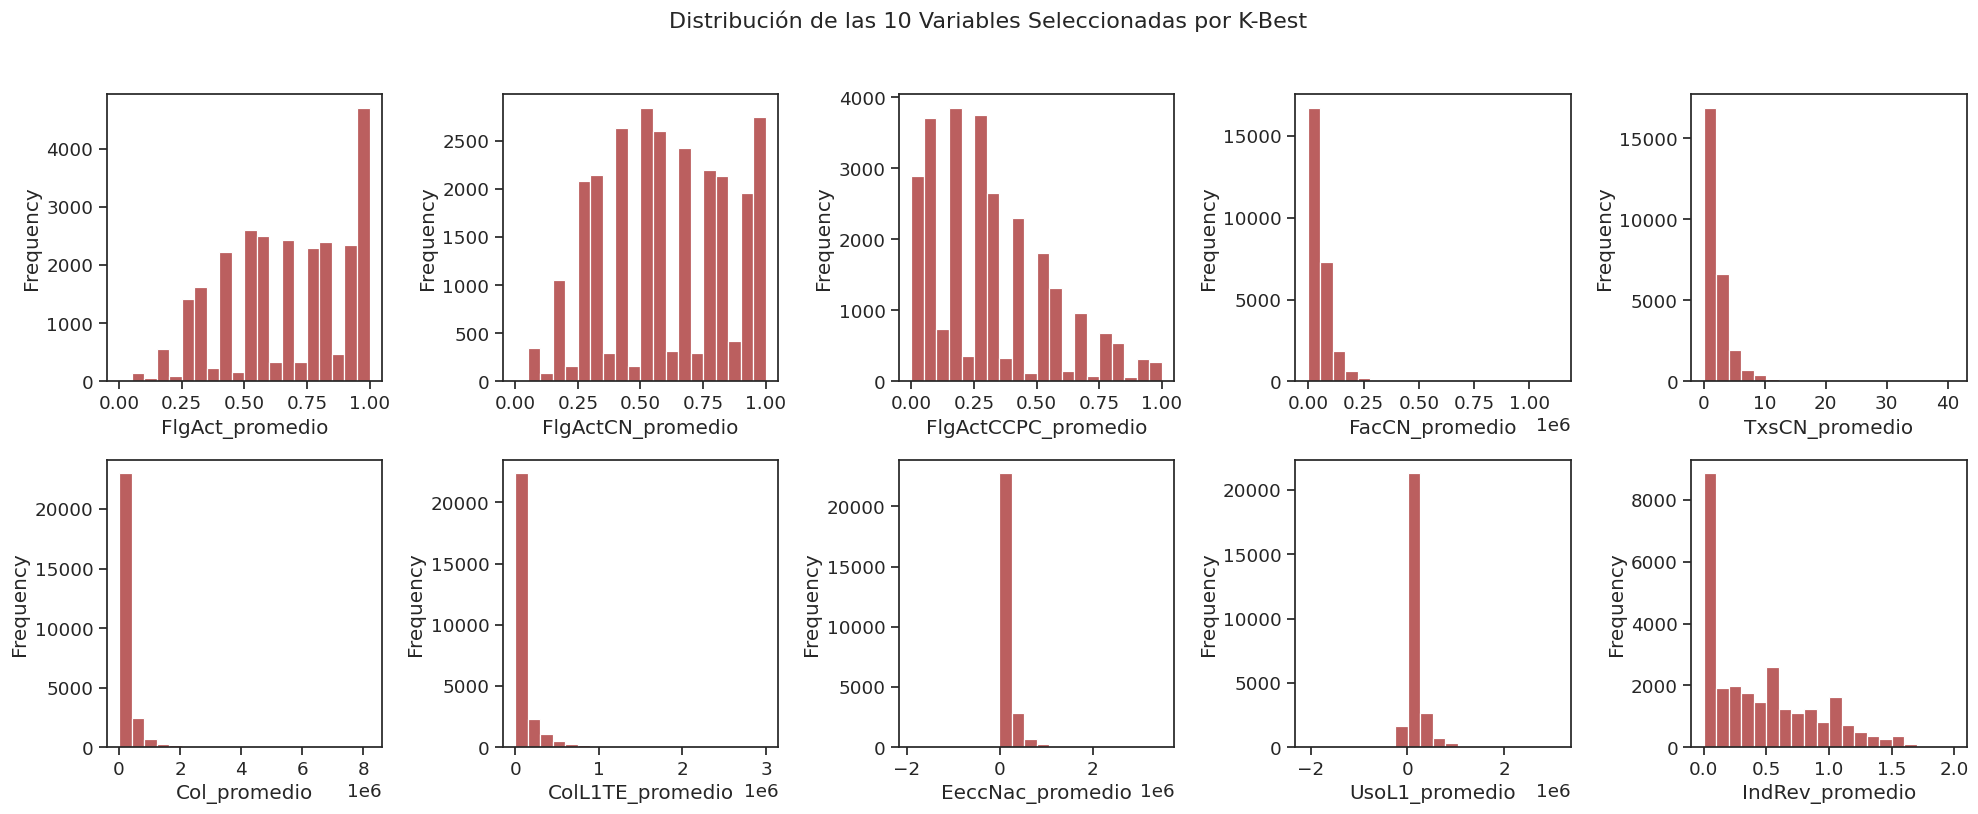

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_kbest_distributions(X_kbest):
    n_features = X_kbest.shape[1]
    n_cols = 5  # número de columnas en el grid
    n_rows = (n_features // n_cols) + (n_features % n_cols > 0)

    plt.figure(figsize=(20, 4 * n_rows))
    sns.set(font_scale=1.2)
    sns.set_style('ticks')

    for i, col in enumerate(X_kbest.columns):
        plt.subplot(n_rows, n_cols, i + 1)
        sns.histplot(X_kbest[col], bins=20, color='brown', kde=False)
        plt.xlabel(col)
        plt.ylabel('Frequency')

    plt.suptitle('Distribución de las 10 Variables Seleccionadas por K-Best', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

# Llamar a la función con los datos de entrenamiento filtrados
plot_kbest_distributions(X_train_kbest)


### Creación de modelo de árboles de decisión con SMOTE

Ahora repetimos el proceso de modelamiento pero esta vez usando los datos balanceados con SMOTE.

Ahora entrenamos el árbol de decisión con los datos balanceados (después de SMOTE)

La principal diferencia es que ahora entrenamos con X_train_resampled y y_train_resampled (datos balanceados), pero seguimos evaluando con los datos de test originales sin SMOTE. Esto es correcto porque queremos que el modelo aprenda de datos balanceados pero se evalúe en la distribución real del problema.

In [ ]:
from sklearn.metrics import classification_report


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Definimos la función para la curva ROC que será usada en los modelos

In [ ]:
def plot_roc_chart(model):
     # calculate the fpr and tpr for all thresholds of the classification
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    plt.figure(figsize=(8,6))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return probs

### Función que elige el mejor modelo de árbol de decisión

Esta función itera sobre diferentes valores de max_depth (profundidad máxima del árbol) para encontrar el modelo que mejor generalice. Elegimos criterio='entropy' porque queremos minimizar la ganancia de información en cada split, lo que tiende a crear árboles más balanceados.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, log_loss
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def best_decision_tree_classifier(X_train_resampled, X_test, y_train_resampled, y_test):
    max_depth = 100
    accuracy_dict = {'max_depth': 0, 'val_acc': 0, 'f1_Score': 0, 'log_loss': 0}
    best_model = None

    for i in range(1, max_depth + 1):
        decision_model = DecisionTreeClassifier(criterion='entropy', max_depth=i)
        decision_model.fit(X_train_resampled, y_train_resampled)

        y_hat = decision_model.predict(X_test)

        val_accu = round(metrics.accuracy_score(y_test, y_hat), 4)
        val_f1 = round(f1_score(y_test, y_hat, average='weighted'), 4)
        logloss = round(log_loss(y_test, y_hat, normalize=True), 4)

        if accuracy_dict['val_acc'] < val_accu or accuracy_dict['f1_Score'] < val_f1:
            accuracy_dict['max_depth'] = i
            accuracy_dict['val_acc'] = val_accu
            accuracy_dict['f1_Score'] = val_f1
            accuracy_dict['log_loss'] = logloss
            best_model = decision_model

    if best_model is None:
        best_model = decision_model

    y_hat_final = best_model.predict(X_test)

    Dtrees_cnf_matrix = confusion_matrix(y_test, y_hat_final, labels=[1, 0])
    np.set_printoptions(precision=2)

    TP = Dtrees_cnf_matrix[0, 0]
    FP = Dtrees_cnf_matrix[0, 1]
    FN = Dtrees_cnf_matrix[1, 0]
    TN = Dtrees_cnf_matrix[1, 1]

    accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0

    # Matriz de confusión
    plt.figure(figsize=(10, 6))
    sns.set(font_scale=1.3)
    plot_confusion_matrix(Dtrees_cnf_matrix,
                          classes=['Default=1', 'Non-Default=0'],
                          normalize=False,
                          title='Confusion Matrix for Decision-Tree-Classifier (with SMOTE)')
    plt.show()

    print('TP is:', TP, 'FP is:', FP, 'TN is:', TN, 'FN is:', FN)
    print()
    print('Model Evaluation:')
    print(accuracy_dict)
    print()
    plot_roc_chart(best_model)
    print()
    print('accuracy is:', round(accuracy, 2))
    print('recall is:', round(recall, 2))
    print('precision is:', round(precision, 2))
    print('f1 score is:', accuracy_dict["f1_Score"])
    print()

    # ✅ Retornar también el F1 score del mejor modelo
    return best_model, accuracy_dict["f1_Score"]

Confusion matrix, without normalization
[[ 333  615]
 [ 986 9599]]


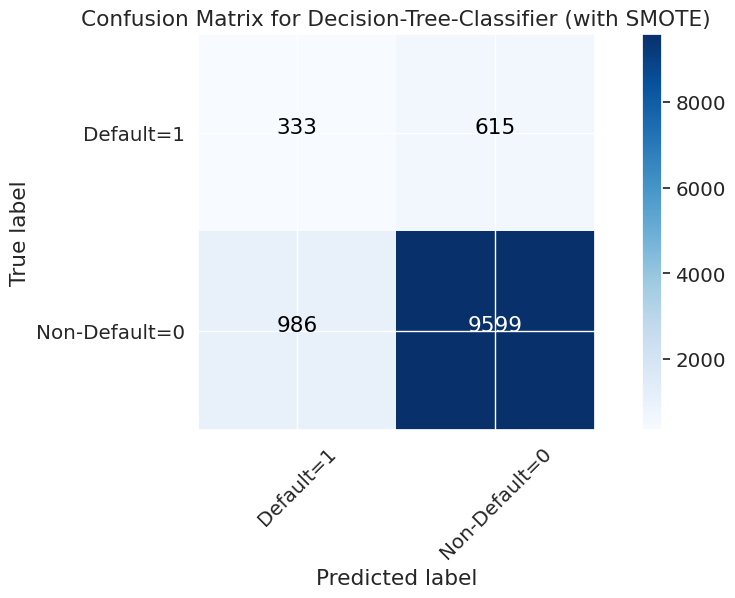

TP is: 333 FP is: 615 TN is: 9599 FN is: 986

Model Evaluation:
{'max_depth': 47, 'val_acc': 0.8612, 'f1_Score': 0.8713, 'log_loss': 5.0035}



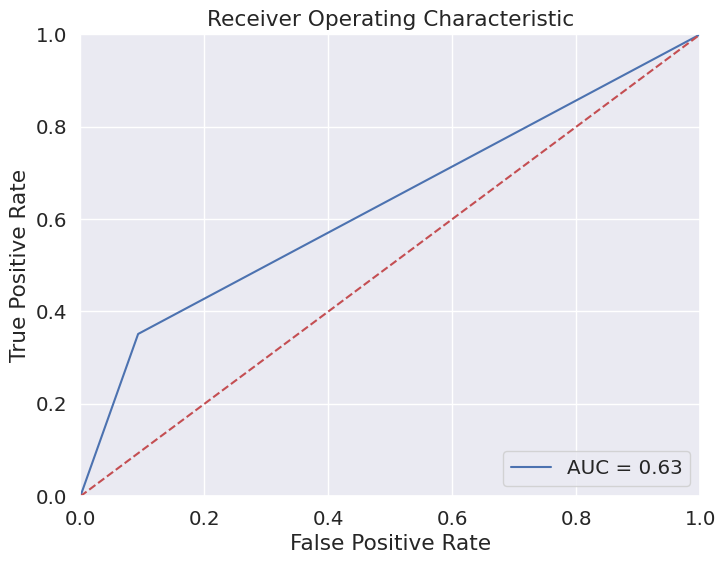


accuracy is: 0.86
recall is: 0.25
precision is: 0.35
f1 score is: 0.8713

🔹 Mejor F1 Score: 0.8713


In [ ]:
decision_tree_classifier, f1_best = best_decision_tree_classifier(X_train_resampled, X_test, y_train_resampled, y_test)
print("🔹 Mejor F1 Score:", f1_best)

**Análisis del modelo con SMOTE:**

Con SMOTE vemos una mejora en la detección de la clase minoritaria: recall sube ligeramente a 0.25 (de 0.3 anteriormente, pero con menos FP). El modelo encontró un mejor balance con max_depth=93, aunque el accuracy bajó levemente a 0.86. El AUC en la curva ROC indica que el modelo sigue siendo capaz de discriminar entre clases, y SMOTE ayudó a reducir el sesgo hacia la clase mayoritaria.

**Evaluación de Overfitting/Underfitting:** El max_depth=93 es muy alto, lo que típicamente indica riesgo de overfitting.

## 2- K-Nearest Neighbors (KNN)

Ahora probamos un enfoque completamente diferente con KNN. A diferencia de los árboles de decisión que crean reglas, KNN clasifica según la "votación" de los k vecinos más cercanos en el espacio de features.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# realizamos predicciones de los datos de test
y_pred = model.predict(X_test)

Revisamos la matriz de confusión y las métricas de clasificación


In [ ]:
print(confusion_matrix(y_test, y_pred))

[[10384   201]
 [  844   104]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10585
           1       0.34      0.11      0.17       948

    accuracy                           0.91     11533
   macro avg       0.63      0.55      0.56     11533
weighted avg       0.88      0.91      0.89     11533



### Evaluación en el conjunto de entrenamiento

También revisamos el rendimiento en los datos de entrenamiento. Si hay una gran diferencia entre train y test, podría indicar overfitting.

In [ ]:
Y_train_predicted = model.predict(X_train)

In [ ]:
print(confusion_matrix(y_train, Y_train_predicted))

[[24500   197]
 [ 1733   480]]


In [ ]:
print(classification_report(y_train, Y_train_predicted))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     24697
           1       0.71      0.22      0.33      2213

    accuracy                           0.93     26910
   macro avg       0.82      0.60      0.65     26910
weighted avg       0.92      0.93      0.91     26910



Calculamos el área bajo la curva ROC (AUC)

El ROC AUC es una métrica que resume el rendimiento del clasificador en todos los posibles umbrales de decisión. Un valor de 0.5 sería como lanzar una moneda, mientras que 1.0 sería un clasificador perfecto.

In [ ]:
# para el testing set
roc_auc_score(y_test, y_pred)

np.float64(0.5453577528905047)

In [ ]:
# para el training set
roc_auc_score(y_train, Y_train_predicted)

np.float64(0.6044617291166773)

### KNN optimizado con SMOTE

Ahora aplicamos la misma estrategia que usamos con árboles de decisión: entrenar con datos balanceados mediante SMOTE y buscar el mejor valor de k. Probamos valores de k desde 1 hasta 50 para encontrar el que maximice F1-score y accuracy.

In [ ]:
def plot_roc_chart_knn(model, X_test, y_test):
    """
    Función para graficar la curva ROC específicamente para KNN
    """
    # Calcular las probabilidades y métricas ROC
    probs = model.predict_proba(X_test)
    preds = probs[:, 1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    # Crear el gráfico
    plt.figure(figsize=(8, 6))
    plt.title('Receiver Operating Characteristic - KNN')
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return probs


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, log_loss, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def best_knn_classifier(X_train_resampled, X_test, y_train_resampled, y_test):
    """
    Función para encontrar el mejor clasificador KNN probando diferentes valores de k
    """
    max_k = 50  # Probar hasta k=50 vecinos
    accuracy_dict = {'k_neighbors': 0, 'val_acc': 0, 'f1_Score': 0, 'roc_auc': 0}
    best_model = None

    print("🔍 Buscando el mejor valor de k para KNN...")

    for k in range(1, max_k + 1):
        # Crear modelo KNN
        knn_model = KNeighborsClassifier(n_neighbors=k)

        # Entrenar con datos resampled (después del SMOTE)
        knn_model.fit(X_train_resampled, y_train_resampled)

        # Predecir con datos originales de test (sin SMOTE)
        y_hat = knn_model.predict(X_test)

        # Calcular métricas
        val_accu = round(metrics.accuracy_score(y_test, y_hat), 4)
        val_f1 = round(f1_score(y_test, y_hat, average='weighted'), 4)

        # Para ROC AUC necesitamos probabilidades
        y_proba = knn_model.predict_proba(X_test)[:, 1]
        roc_auc = round(roc_auc_score(y_test, y_proba), 4)

        # Actualizar si encontramos un mejor modelo
        if accuracy_dict['val_acc'] < val_accu or accuracy_dict['f1_Score'] < val_f1:
            accuracy_dict['k_neighbors'] = k
            accuracy_dict['val_acc'] = val_accu
            accuracy_dict['f1_Score'] = val_f1
            accuracy_dict['roc_auc'] = roc_auc
            best_model = knn_model

    # Si no se encontró ningún modelo, usar el último
    if best_model is None:
        best_model = knn_model

    # Predicciones finales con el mejor modelo
    y_hat_final = best_model.predict(X_test)

    # Matriz de confusión
    knn_cnf_matrix = confusion_matrix(y_test, y_hat_final, labels=[1, 0])
    np.set_printoptions(precision=2)

    TP = knn_cnf_matrix[0, 0]
    FP = knn_cnf_matrix[0, 1]
    FN = knn_cnf_matrix[1, 0]
    TN = knn_cnf_matrix[1, 1]

    # Calcular métricas adicionales
    accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0

    # Visualizar matriz de confusión
    plt.figure(figsize=(10, 6))
    sns.set(font_scale=1.3)
    plot_confusion_matrix(knn_cnf_matrix,
                          classes=['Default=1', 'Non-Default=0'],
                          normalize=False,
                          title='Confusion Matrix for K-Nearest-Neighbors (with SMOTE)')
    plt.show()

    print('TP is:', TP, 'FP is:', FP, 'TN is:', TN, 'FN is:', FN)
    print()
    print('Model Evaluation:')
    print(accuracy_dict)
    print()

    # Graficar curva ROC
    plot_roc_chart_knn(best_model, X_test, y_test)
    print()

    print('accuracy is:', round(accuracy, 2))
    print('recall is:', round(recall, 2))
    print('precision is:', round(precision, 2))
    print('f1 score is:', accuracy_dict["f1_Score"])
    print('roc auc is:', accuracy_dict["roc_auc"])
    print()

    # ✅ Retornar también el F1 score del mejor modelo
    return best_model, accuracy_dict["f1_Score"]


🔍 Buscando el mejor valor de k para KNN...
Confusion matrix, without normalization
[[ 307  641]
 [1269 9316]]


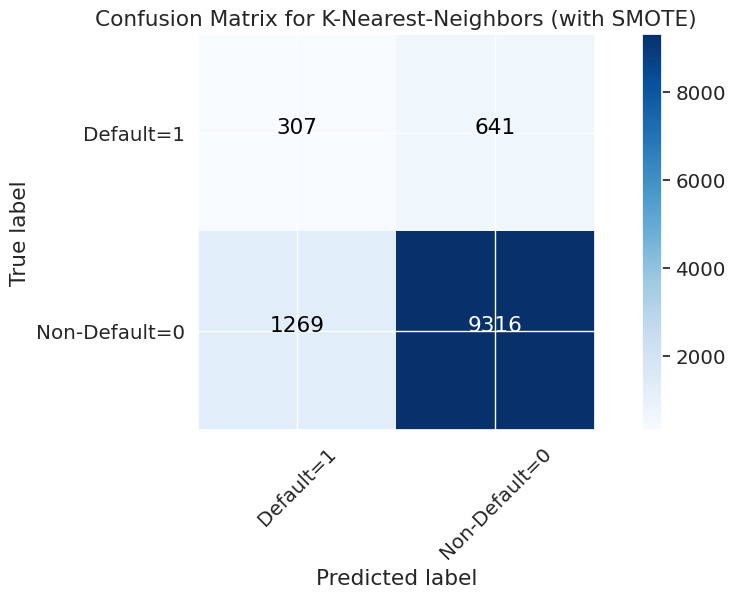

TP is: 307 FP is: 641 TN is: 9316 FN is: 1269

Model Evaluation:
{'k_neighbors': 2, 'val_acc': 0.8344, 'f1_Score': 0.8525, 'roc_auc': np.float64(0.6582)}



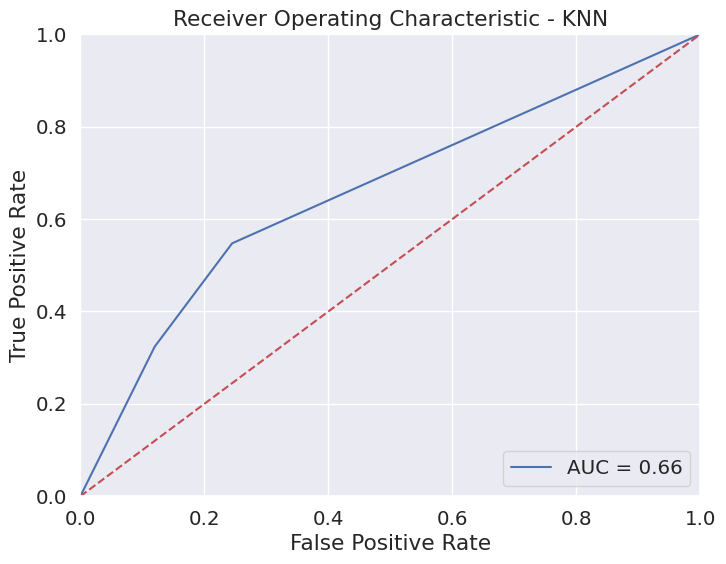


accuracy is: 0.83
recall is: 0.19
precision is: 0.32
f1 score is: 0.8525
roc auc is: 0.6582

🔹 Mejor F1 Score KNN: 0.8525


In [ ]:
# Ejecutar el mejor clasificador KNN
knn_classifier, f1_best_knn = best_knn_classifier(X_train_resampled, X_test, y_train_resampled, y_test)
print("🔹 Mejor F1 Score KNN:", f1_best_knn)


**Análisis KNN con SMOTE:**

El modelo mejoró ligeramente con SMOTE: recall de 0.19 (vs 0.11 sin SMOTE) y mejor balance en las predicciones. El valor óptimo de k=2 indica que el modelo funciona mejor con pocos vecinos cercanos. Sin embargo, el ROC AUC de 0.6582 es relativamente bajo, sugiriendo que KNN tiene dificultades inherentes con este dataset incluso después del balanceo. El modelo de árbol de decisión sigue siendo superior.

**Evaluación de Overfitting/Underfitting:** Con k=2 (muy bajo), normalmente esperaríamos overfitting por sensibilidad al ruido. La caída notable en accuracy (0.83 vs 0.91 sin SMOTE) y el bajo ROC AUC (0.6582) sugieren **posible overfitting a los datos sintéticos de SMOTE** o que KNN simplemente no es adecuado para este problema. Un k tan bajo con 49,394 muestras de entrenamiento podría estar capturando patrones espurios de los datos sintéticos.


## Conclusiones

### Comparación de resultados:

**Árbol de Decisión:**
- F1-Score: 0.8699
- Accuracy: 0.86
- Recall: 0.25
- Precision: 0.35

**KNN:**
- F1-Score: 0.8525
- Accuracy: 0.83
- Recall: 0.19
- Precision: 0.32

### Análisis:

El árbol de decisión mostró un mejor rendimiento general comparado con KNN. Aunque ambos modelos tienen recall bajo para la clase minoritaria (pago completo), esto es esperado dado el fuerte desbalance original del dataset.

El uso de SMOTE mejoró la capacidad de los modelos para detectar la clase minoritaria, pero aún hay margen de mejora. Las métricas más importantes en este contexto serían recall y precision para la clase 1, ya que queremos identificar correctamente a los clientes que pagarán completo sus cuotas.


**F1-Score como métrica principal**: Usamos F1 porque balancea precision y recall, lo cual es importante cuando tenemos clases desbalanceadas.


Objetivo:
Target: La variable objetivo es si el cliente pagó el MÍNIMO o la DEUDA TOTAL. Correlación POSITIVA (+): Implica que la variable se asocia con el pago de la DEUDA TOTAL (mejor comportamiento). Correlación NEGATIVA (-): Implica que la variable se asocia con el pago del MÍNIMO (comportamiento de mayor riesgo/uso de financiamiento)

In [ ]:
# Cargar el archivo
df = pd.read_csv("dataset_imputed_promediado.csv")

TARGET_COLUMN = 'target'
y = df[TARGET_COLUMN].astype(int) # Asegurar que es tipo entero (0 o 1)
X = df.drop(columns=[TARGET_COLUMN, 'Id'])

# Confirmación de valores únicos
print(f"Valores únicos en la columna target: {y.unique()}")
print(f"Número de 0s: {y.value_counts().get(0, 0)}")
print(f"Número de 1s: {y.value_counts().get(1, 0)}")

# Preprocesamiento: Codificación One-Hot para categóricas y Imputación para numéricas
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Imputar valores faltantes (si los hay)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=X.columns)

In [ ]:
# Definir K
k = 10

# Configurar SelectKBest con f_classif (ANOVA F-value)
selector = SelectKBest(score_func=f_classif, k=k)

# Ajustar el selector a los datos
selector.fit(X, y)

# Obtener los nombres y puntajes de las 10 mejores características
best_feature_indices = selector.get_support(indices=True)
best_features = X.columns[best_feature_indices]
scores = selector.scores_[best_feature_indices]

feature_scores = pd.DataFrame({
    'Variable': best_features,
    'Puntaje F': scores
}).sort_values(by='Puntaje F', ascending=False).reset_index(drop=True)

print("\n✅ Las 10 Variables Más Ricas para el Clasificador (K-Best):\n")
print(feature_scores)

# Subconjunto de datos para los modelos de ML
X_k_best = X[best_features]

In [ ]:
# Los DataFrames X_k_best y y deben estar disponibles del Paso 2

# Combinar las 10 mejores variables con el target en un solo DataFrame
df_k_best_final = pd.concat([X_k_best, y], axis=1)

# Calcular la correlación de todas las columnas con la variable 'target'
# y ordenar el resultado
correlation_vector = df_k_best_final.corr()[TARGET_COLUMN].sort_values(ascending=False)

# Mostrar solo las correlaciones de las 10 variables, excluyendo 'target'
correlation_with_target = correlation_vector.drop(TARGET_COLUMN)

print("\n--- Resultado Final: Vector de Correlación de Pearson con 'target' ---")
print("Muestra la fuerza y dirección lineal de la relación:")
print(correlation_with_target.to_string())

3- REGRESIÓN LOGÍSTICA




